In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

1


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [7]:
problems = ["dw4", "lj13", "qm9"]
problem = problems[1]
if problem == "dw4":
    dim = 2
    n_nodes = 4
    from examples.dw4 import *
    import target.double_well as dw4
    target_log_prob_fn = dw4.log_prob_fn
elif problem == "lj13":
    dim = 3
    n_nodes = 13
    from examples.lj13 import *
    import target.leonard_jones as lj13
    target_log_prob_fn = lj13.log_prob_fn
else:
    dim = 3
    n_nodes = 19
    from examples.qm9 import *
    target_log_prob_fn = None

In [13]:
from examples.train import plot_sample_hist, eval_fn, original_dataset_to_joint_dataset, default_plotter
import yaml
import jax
import matplotlib.pyplot as plt

In [5]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [6]:
cfg = DictConfig(yaml.safe_load(open(f"examples/config/{problem}.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'target': {'aug_global_centering': False, 'aug_scale': 1.0}, 'flow': {'base': {'aug_scale_init': '${target.aug_scale}', 'double_centered_gaussian': False}, 'dim': 3, 'nodes': 13, 'n_layers': 4, 'identity_init': True, 'type': 'proj', 'kwargs': {'proj': {'global_frame': False, 'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False}, 'proj_v2': {'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False, 'n_vectors': 10}}, 'act_norm': False, 'fast_compile': True, 'compile_n_unroll': 1, 'nets': {'use_mace': False, 'mace': {'n_invariant_feat_hidden': 16, 'n_vectors_hidden': 16, 'bessel_number': 'int', 'r_max': 5.0}, 'egnn': {'mlp_units': [32, 32], 'n_layers': 3, 'h_linear_softmax': True, 'h_embedding_dim': 16}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 1.0}, 'mlp_head_config': {'mlp_units': [32, 32]}}}, 'training': {'lr': '6e-4', 'use_64_bit': Fa

# Train

In [8]:
cfg.training.lr = 6e-4
cfg.flow.n_layers=4
cfg.flow.type = ['proj']


cfg.training.batch_size = 64
cfg.training.n_epoch = 10
cfg.training.save = False
cfg.training.plot_batch_size = 64
cfg.logger = DictConfig({"list_logger": None})

cfg.flow.act_norm = False

creating flow of type ['proj']
training data shape of (960, 13, 3)


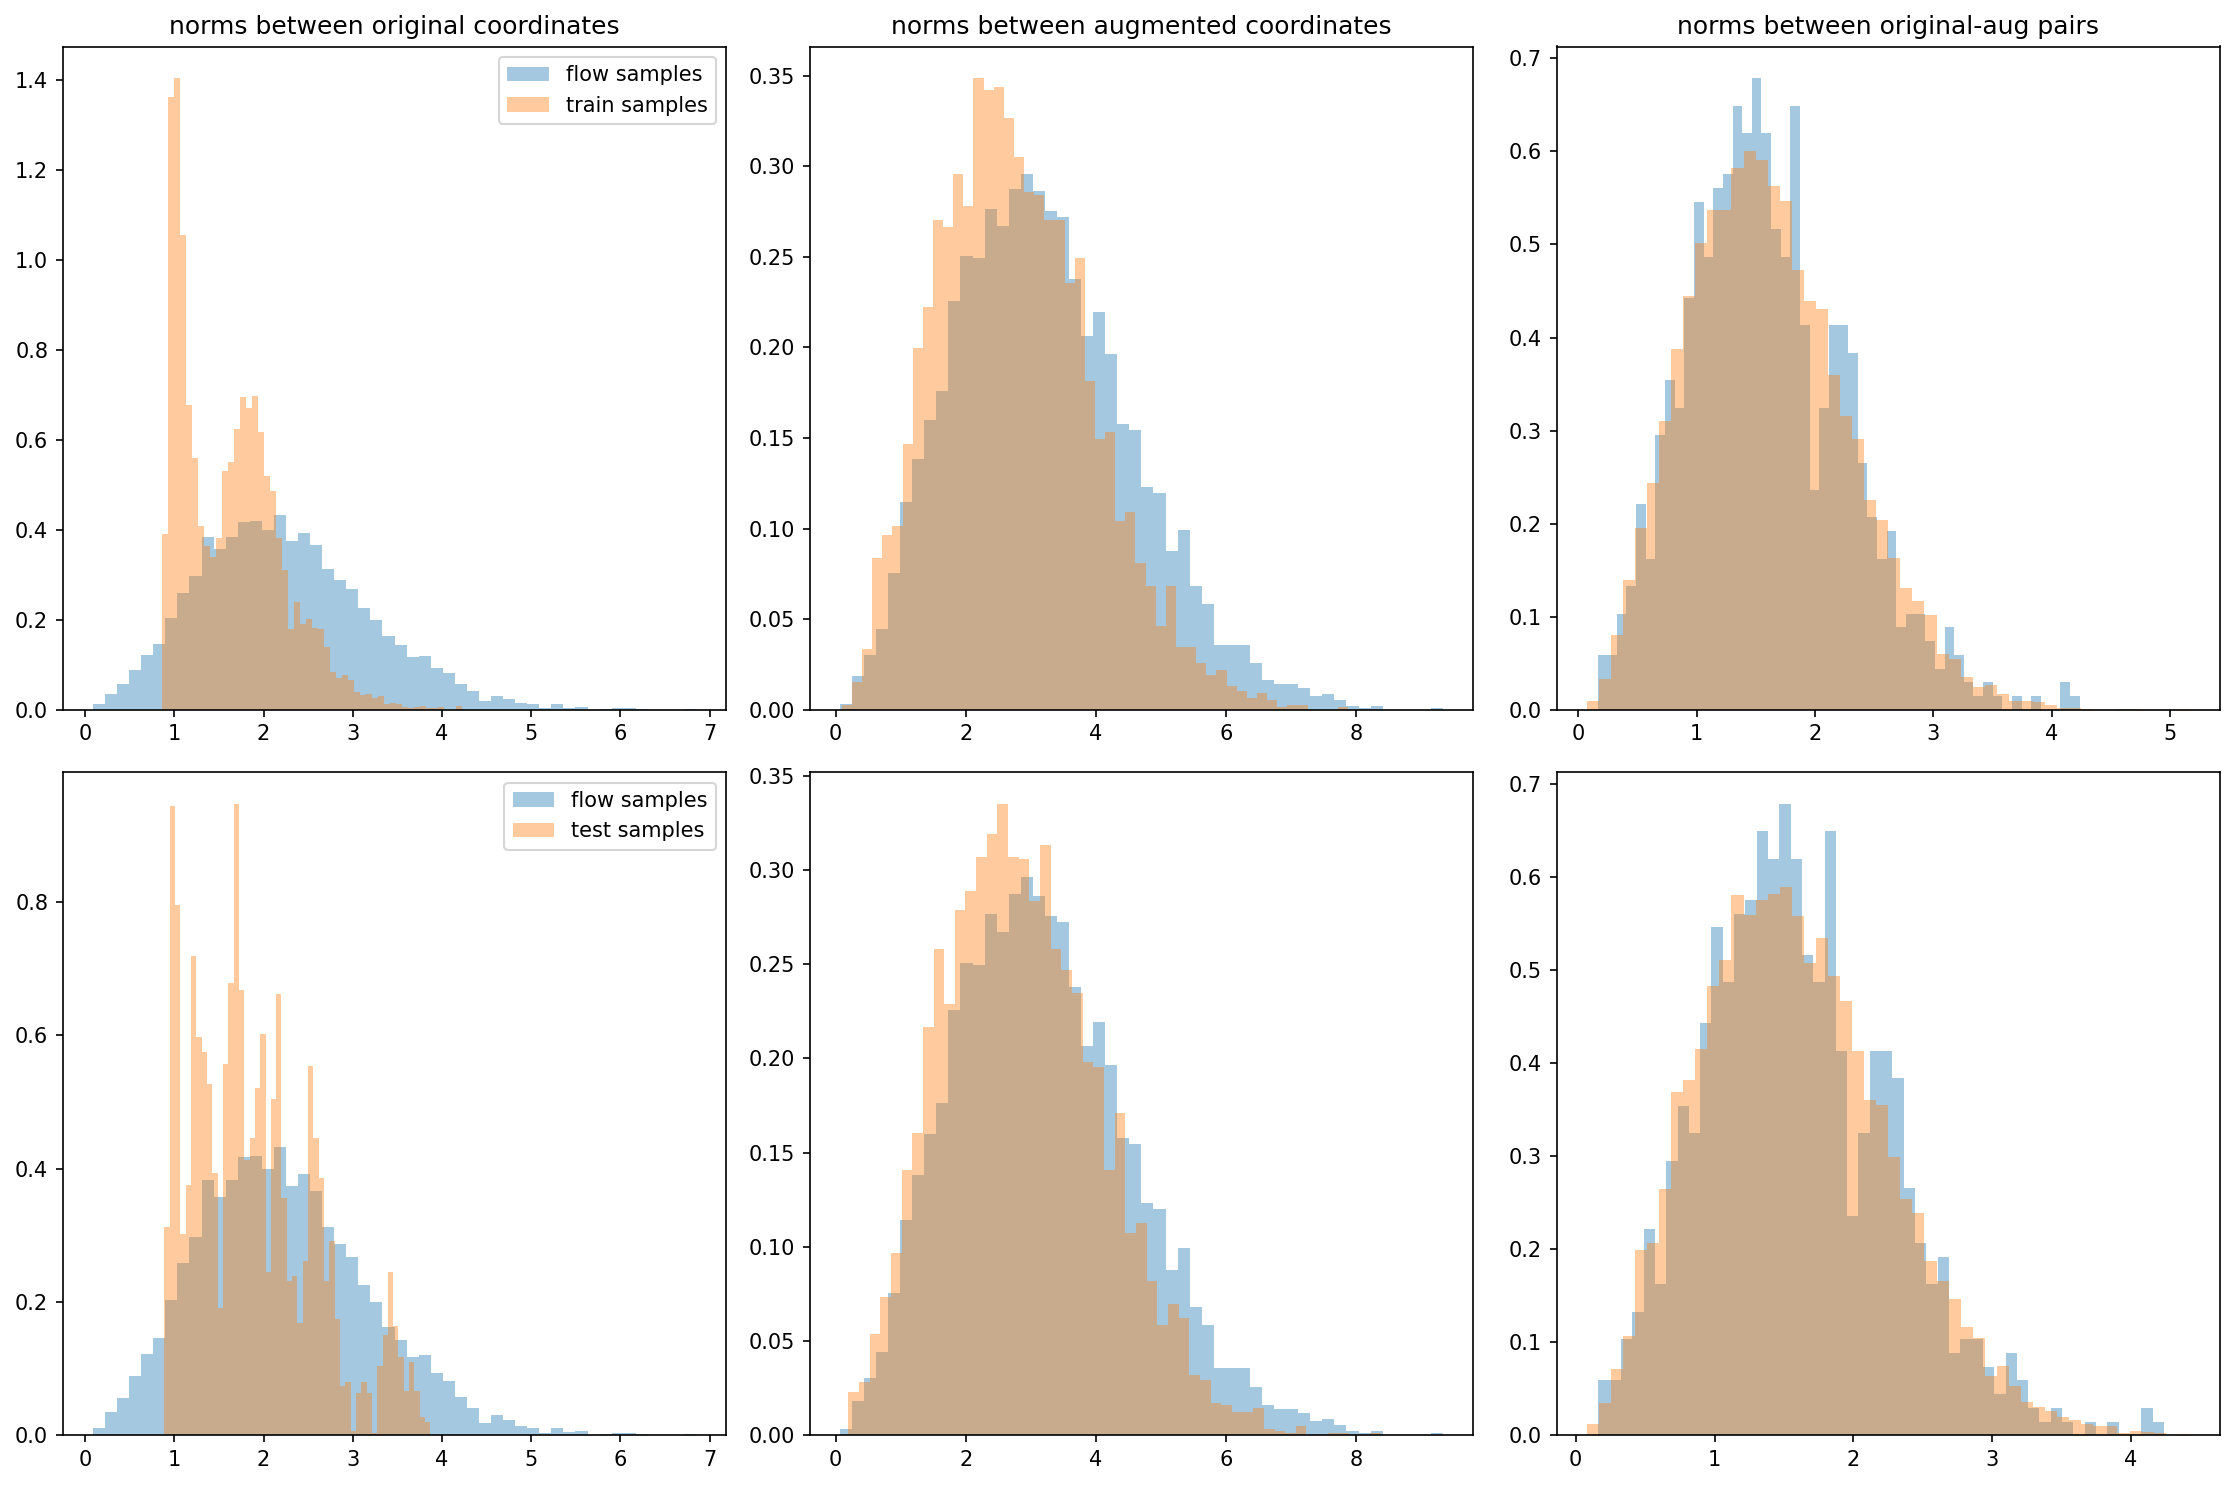

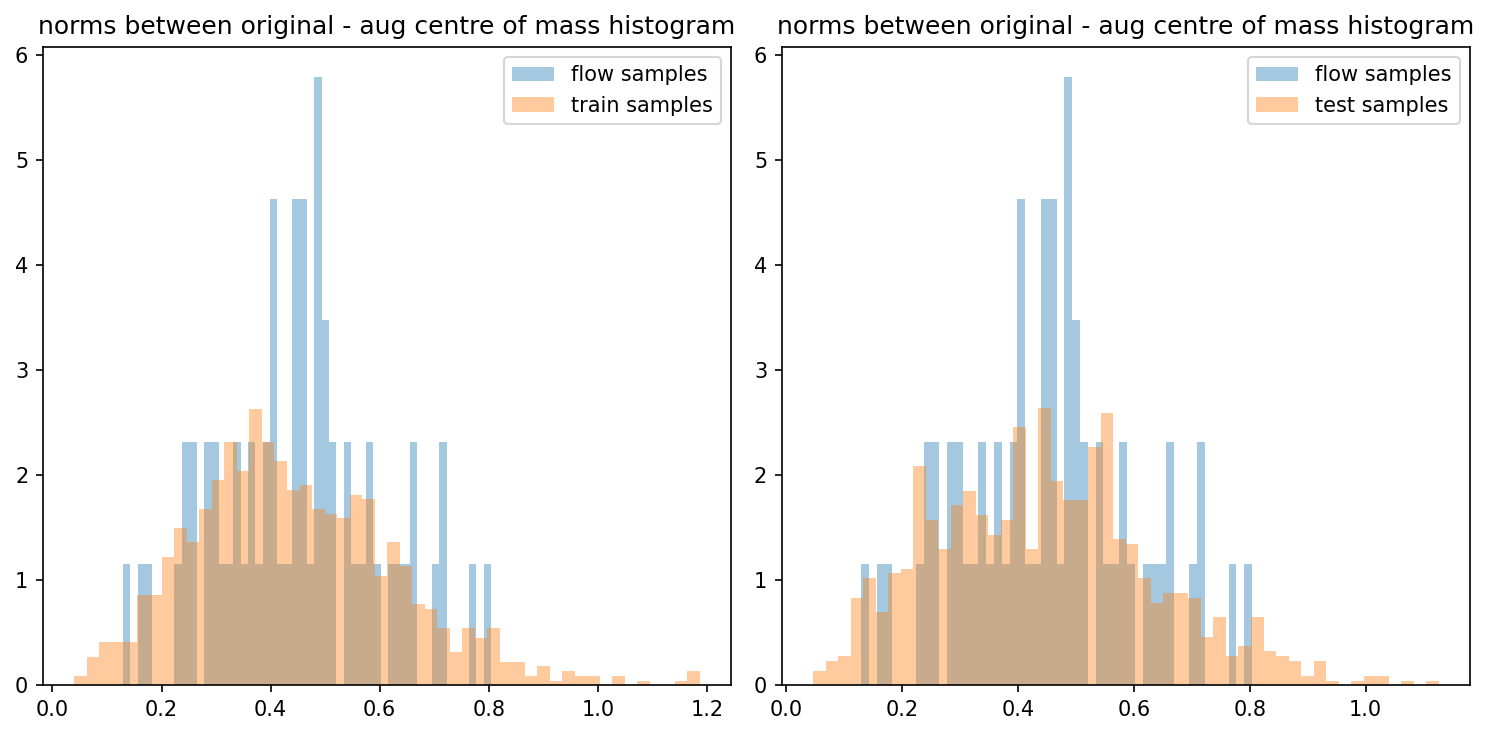

  0%|                                                    | 0/10 [00:00<?, ?it/s]

non numeric history values being saved


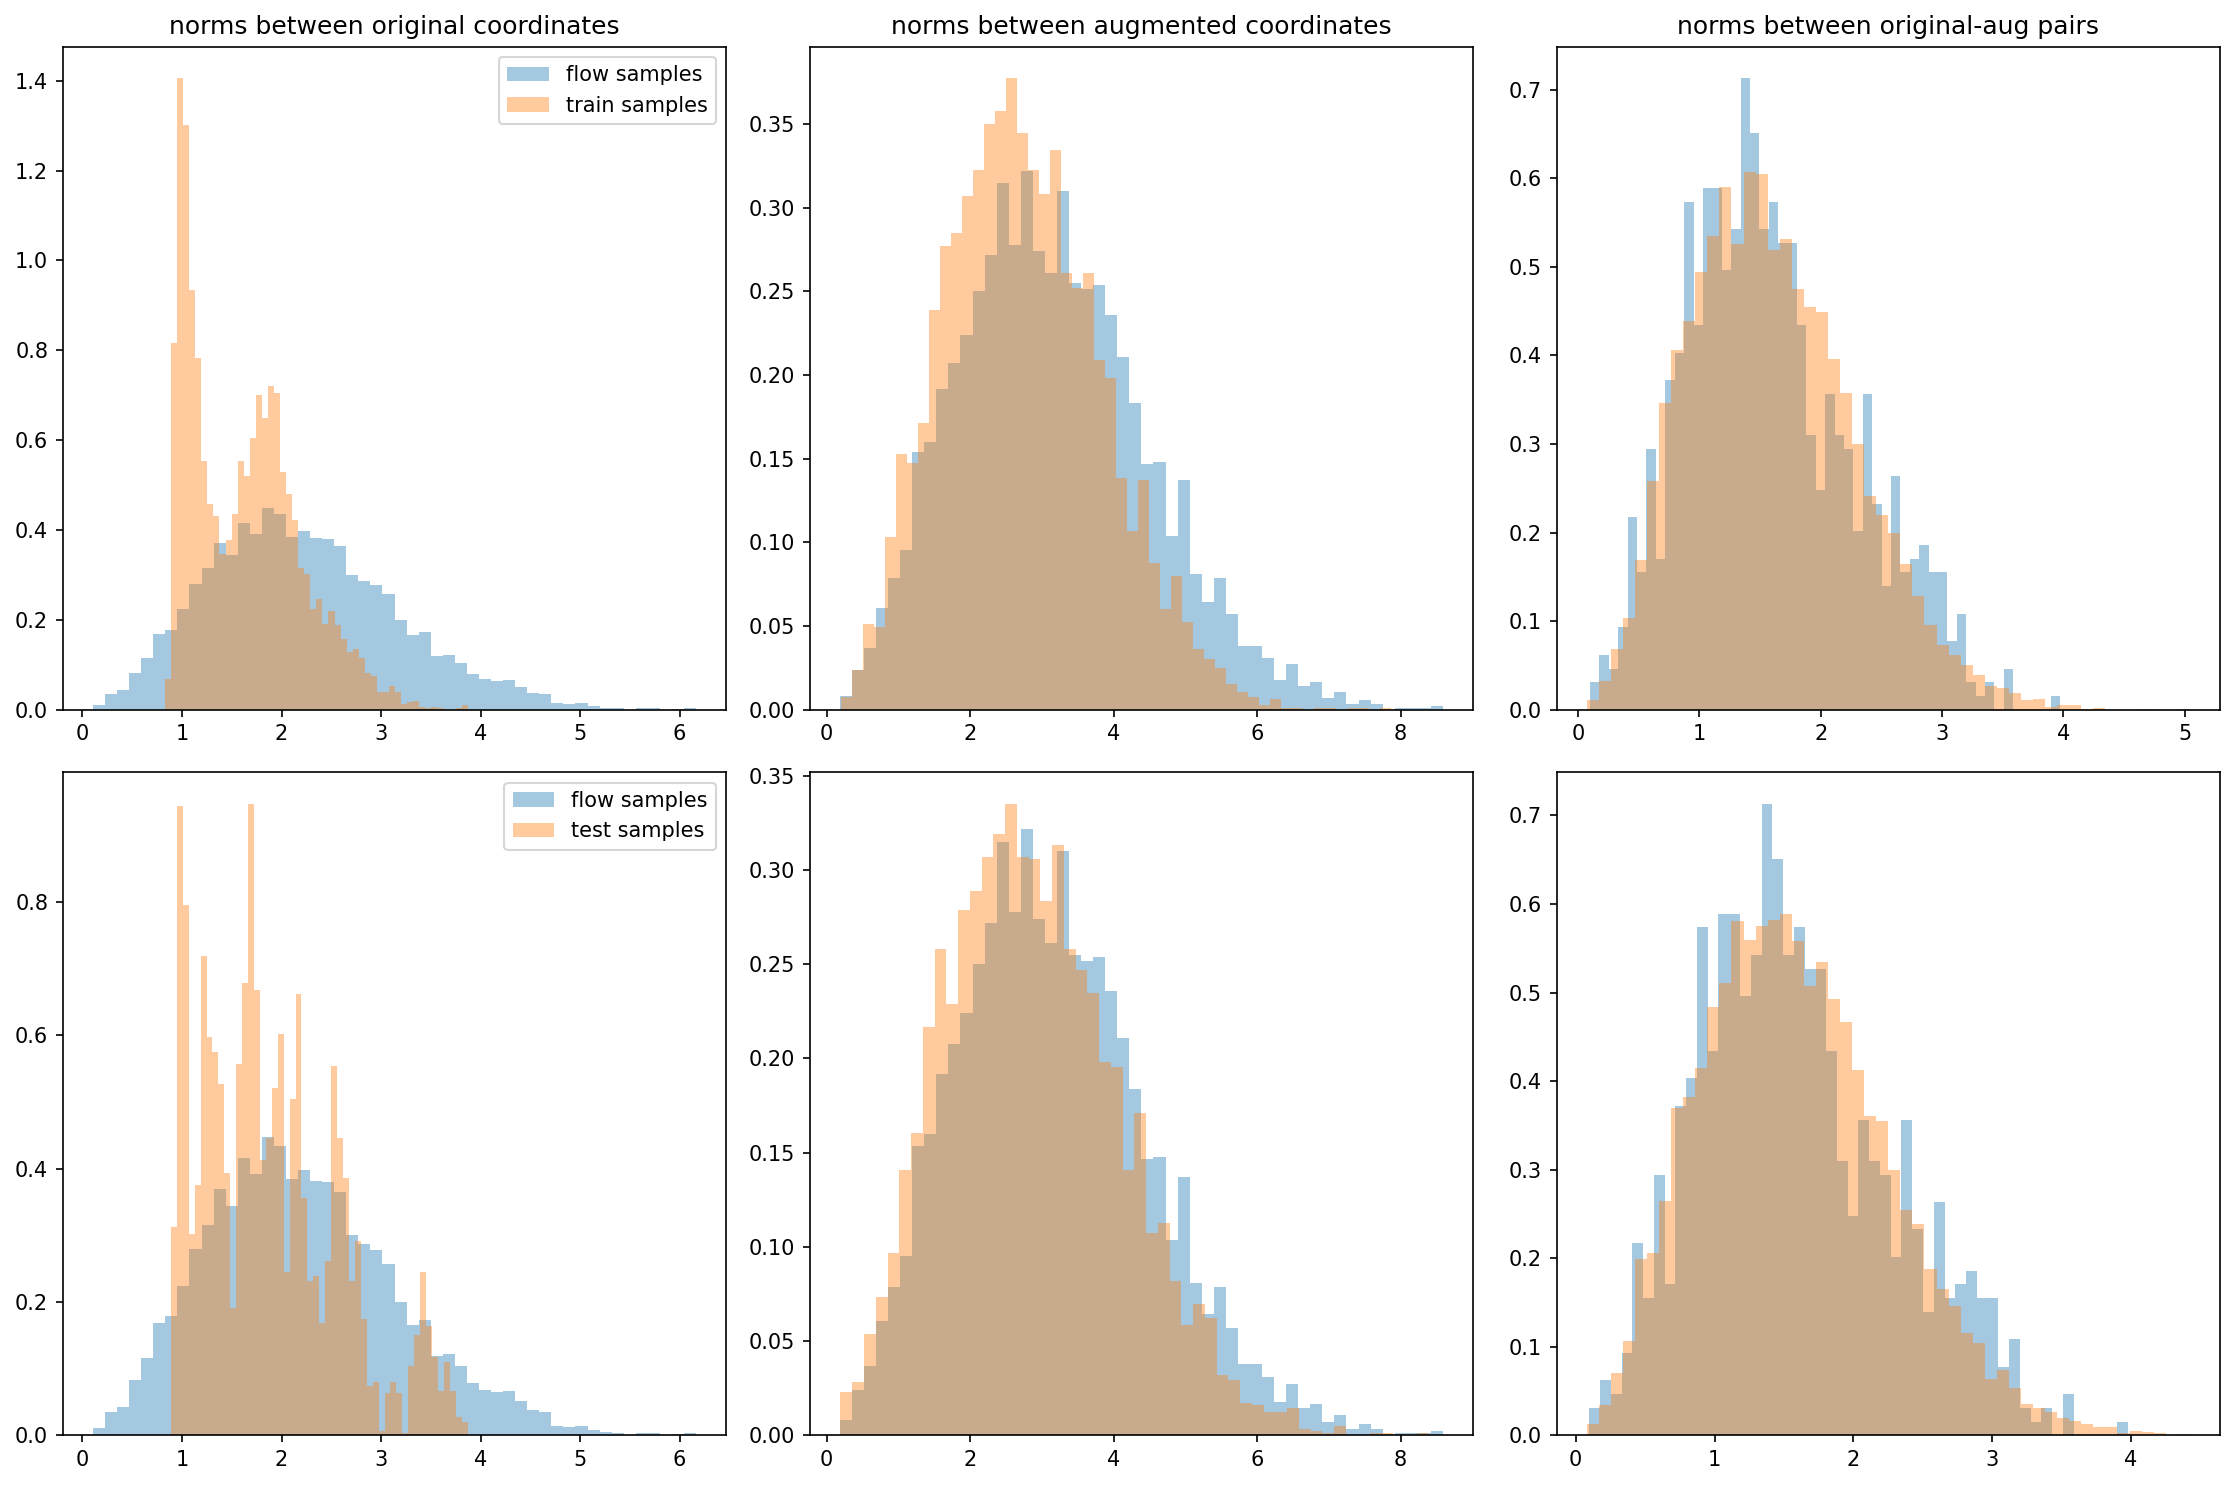

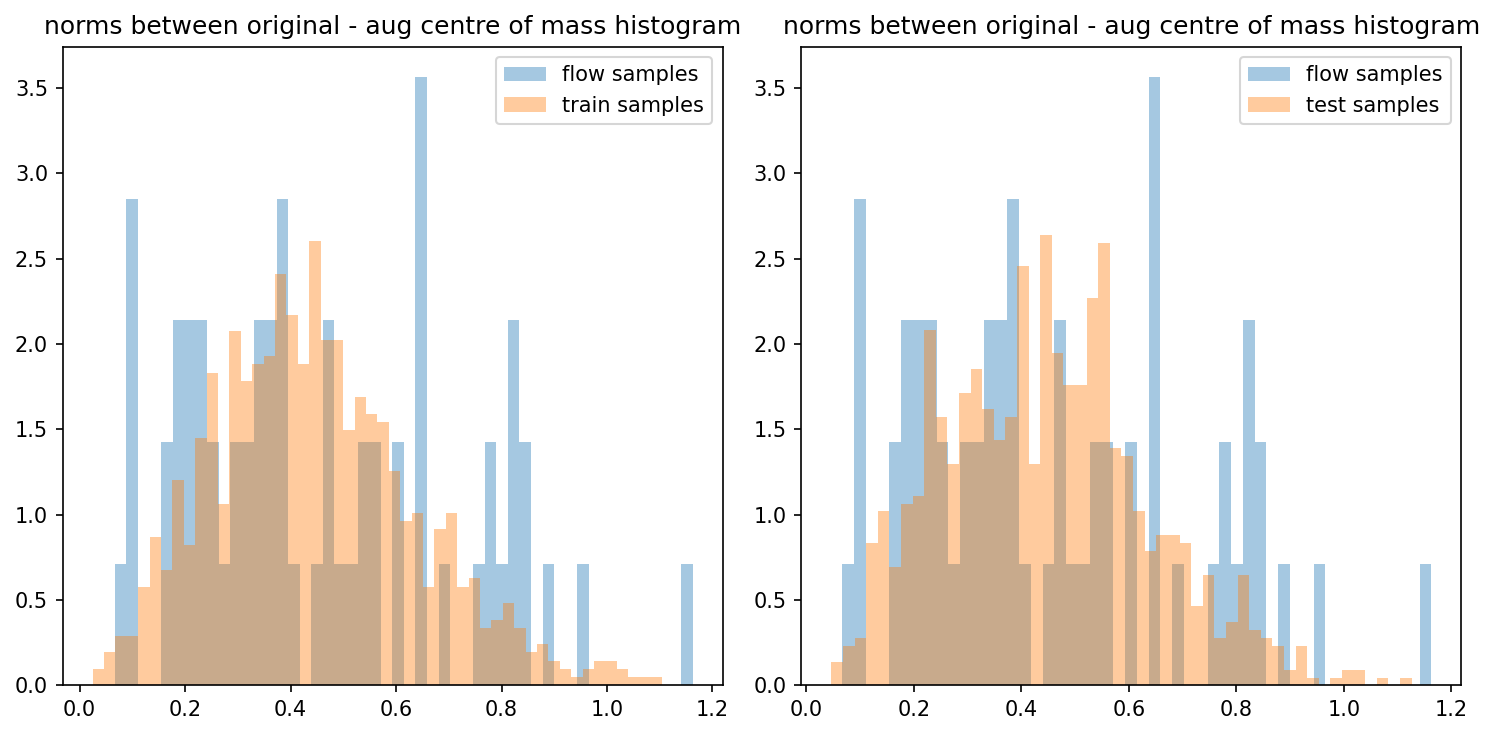

 10%|████▍                                       | 1/10 [00:39<05:54, 39.42s/it]

{'eval_log_lik': Array(-98.682785, dtype=float32), 'eval_marginal_log_lik': Array(-36.770638, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00117696, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00013911, dtype=float32), 'mean_aug_orig_norm': Array(0.4278525, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5286255, dtype=float32)}


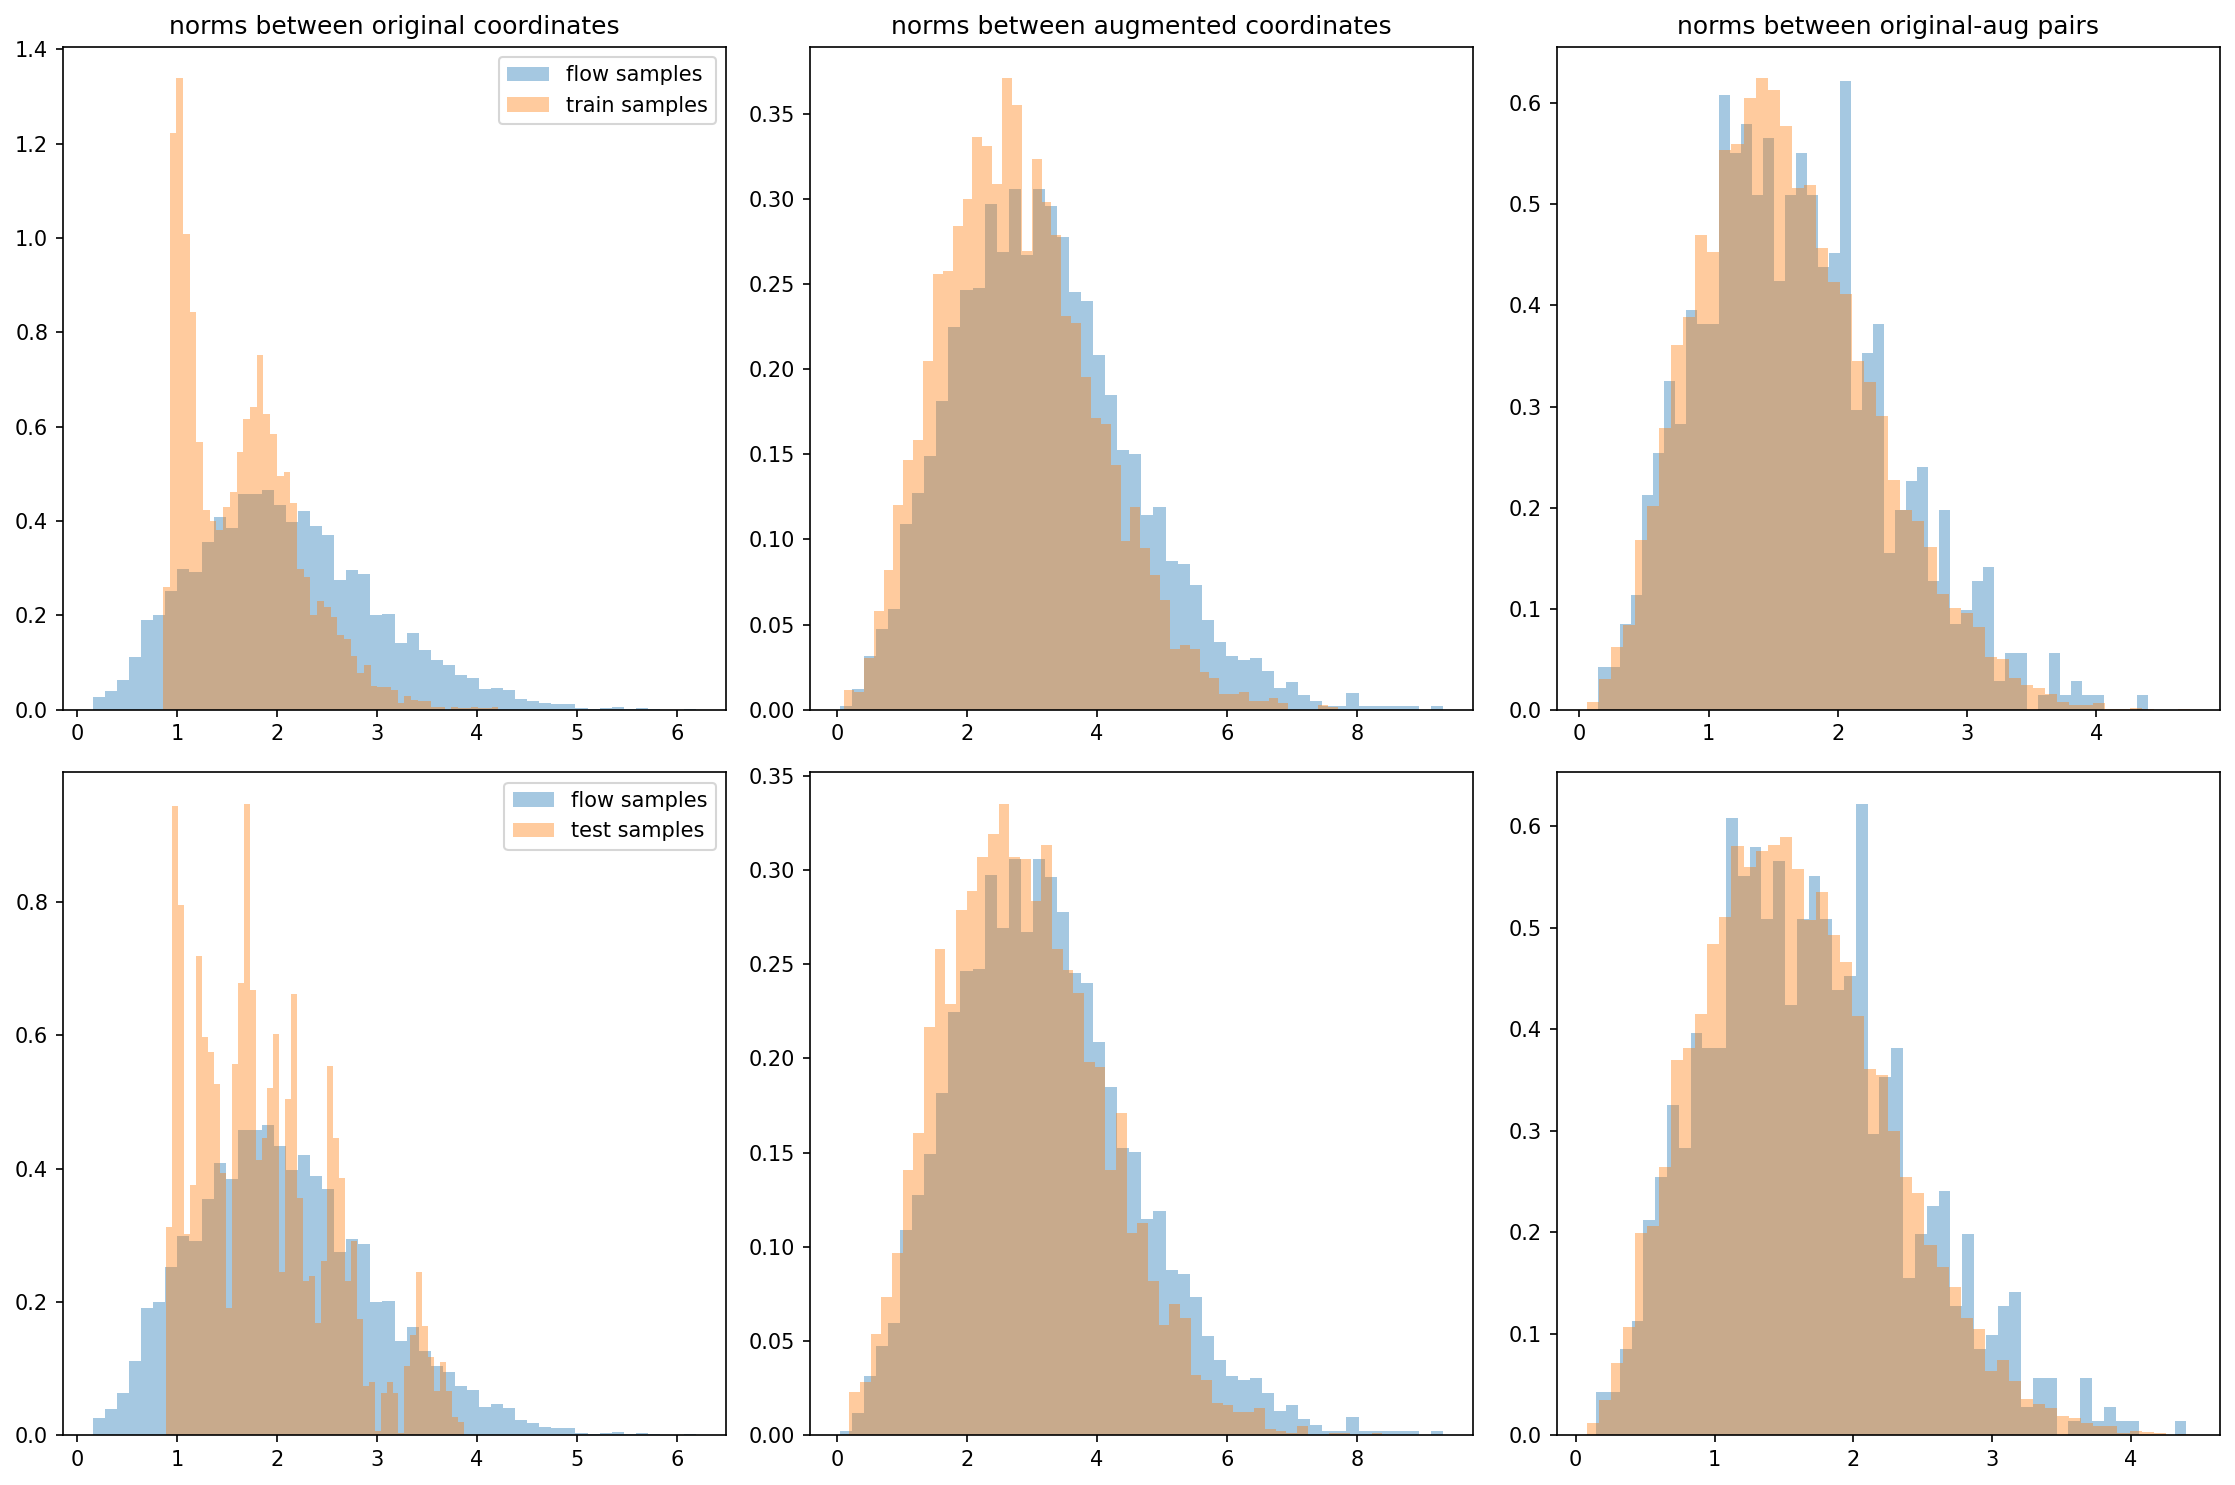

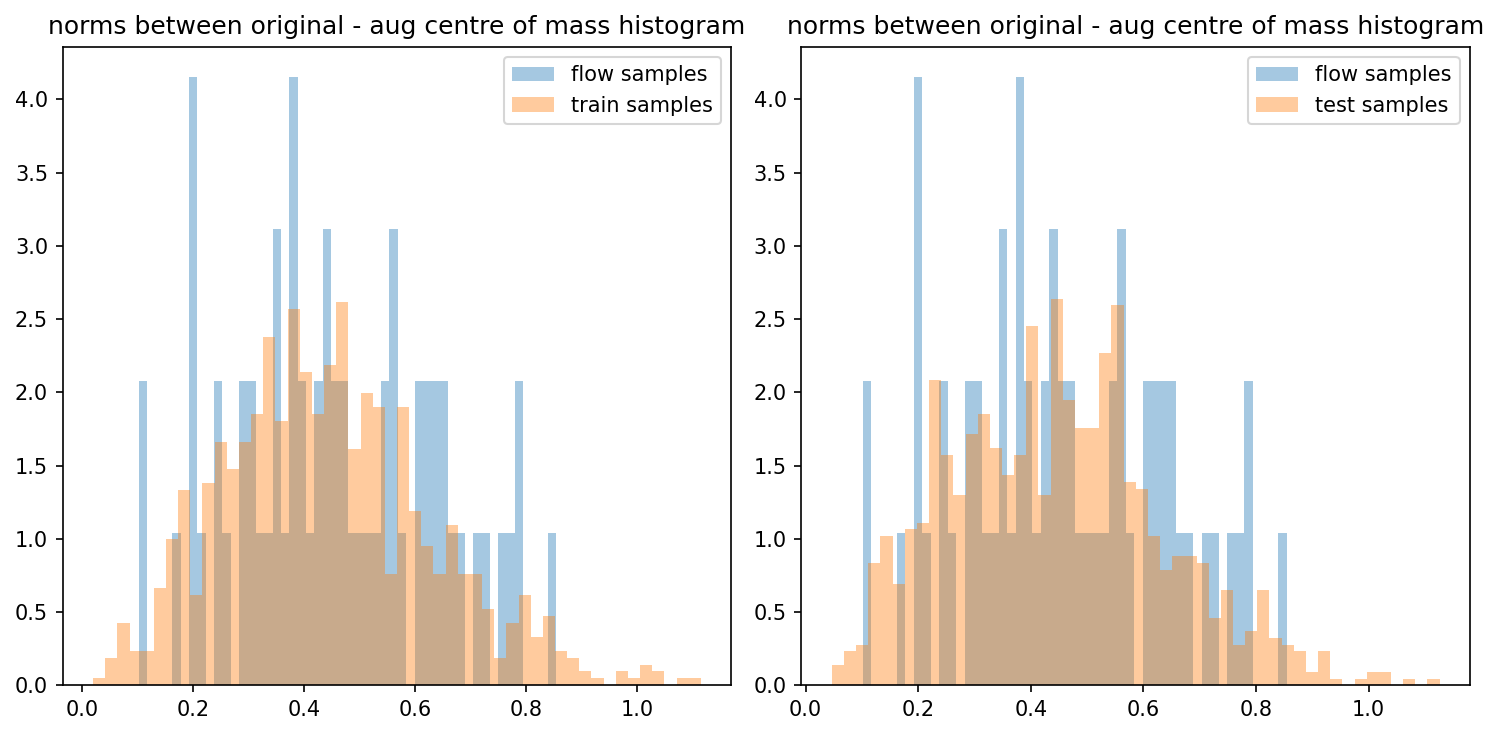

 20%|████████▊                                   | 2/10 [00:46<02:41, 20.23s/it]

{'eval_log_lik': Array(-98.232956, dtype=float32), 'eval_marginal_log_lik': Array(-36.430397, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01117249, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00130289, dtype=float32), 'mean_aug_orig_norm': Array(0.44230312, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5520896, dtype=float32)}


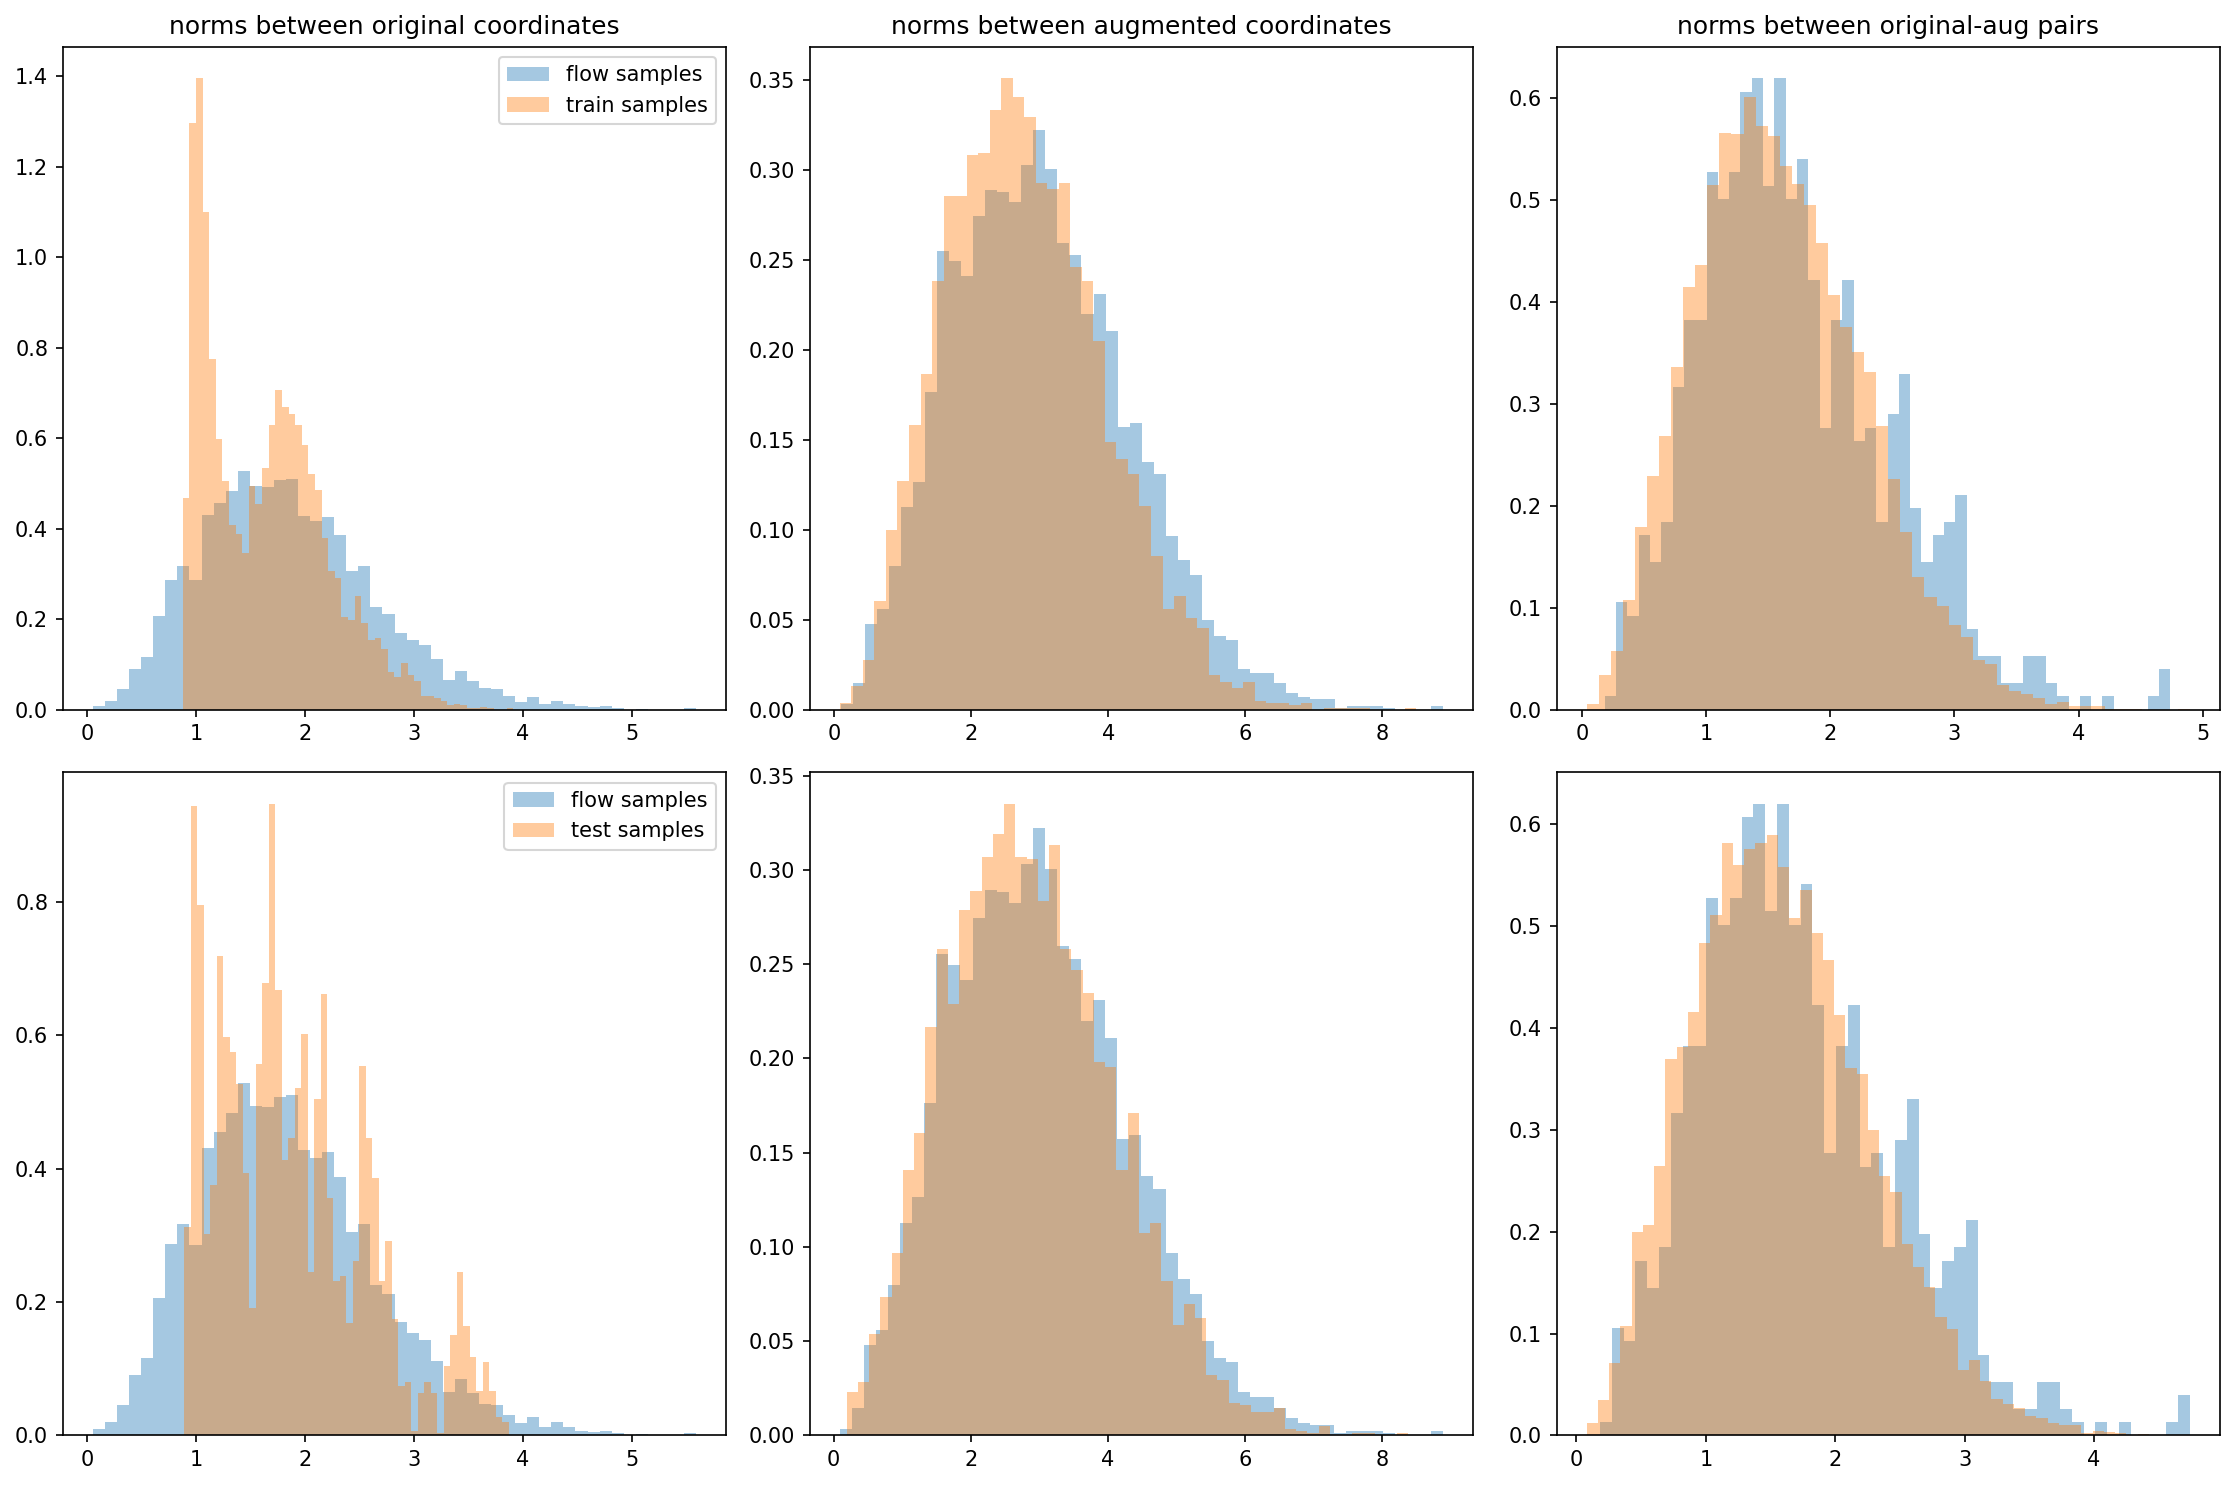

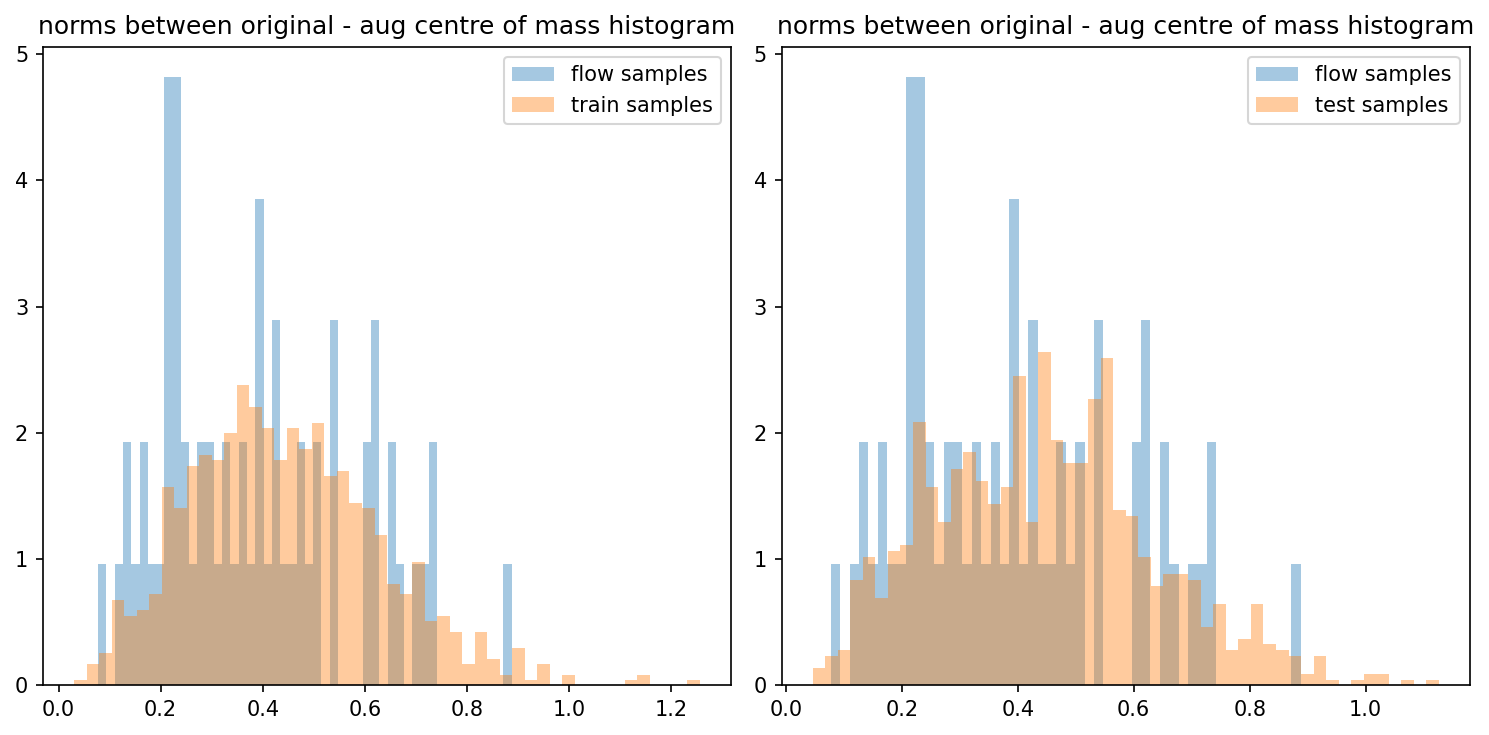

 30%|█████████████▏                              | 3/10 [00:53<01:39, 14.21s/it]

{'eval_log_lik': Array(-97.718994, dtype=float32), 'eval_marginal_log_lik': Array(-35.89669, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01253154, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.001358, dtype=float32), 'mean_aug_orig_norm': Array(0.405469, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.564335, dtype=float32)}


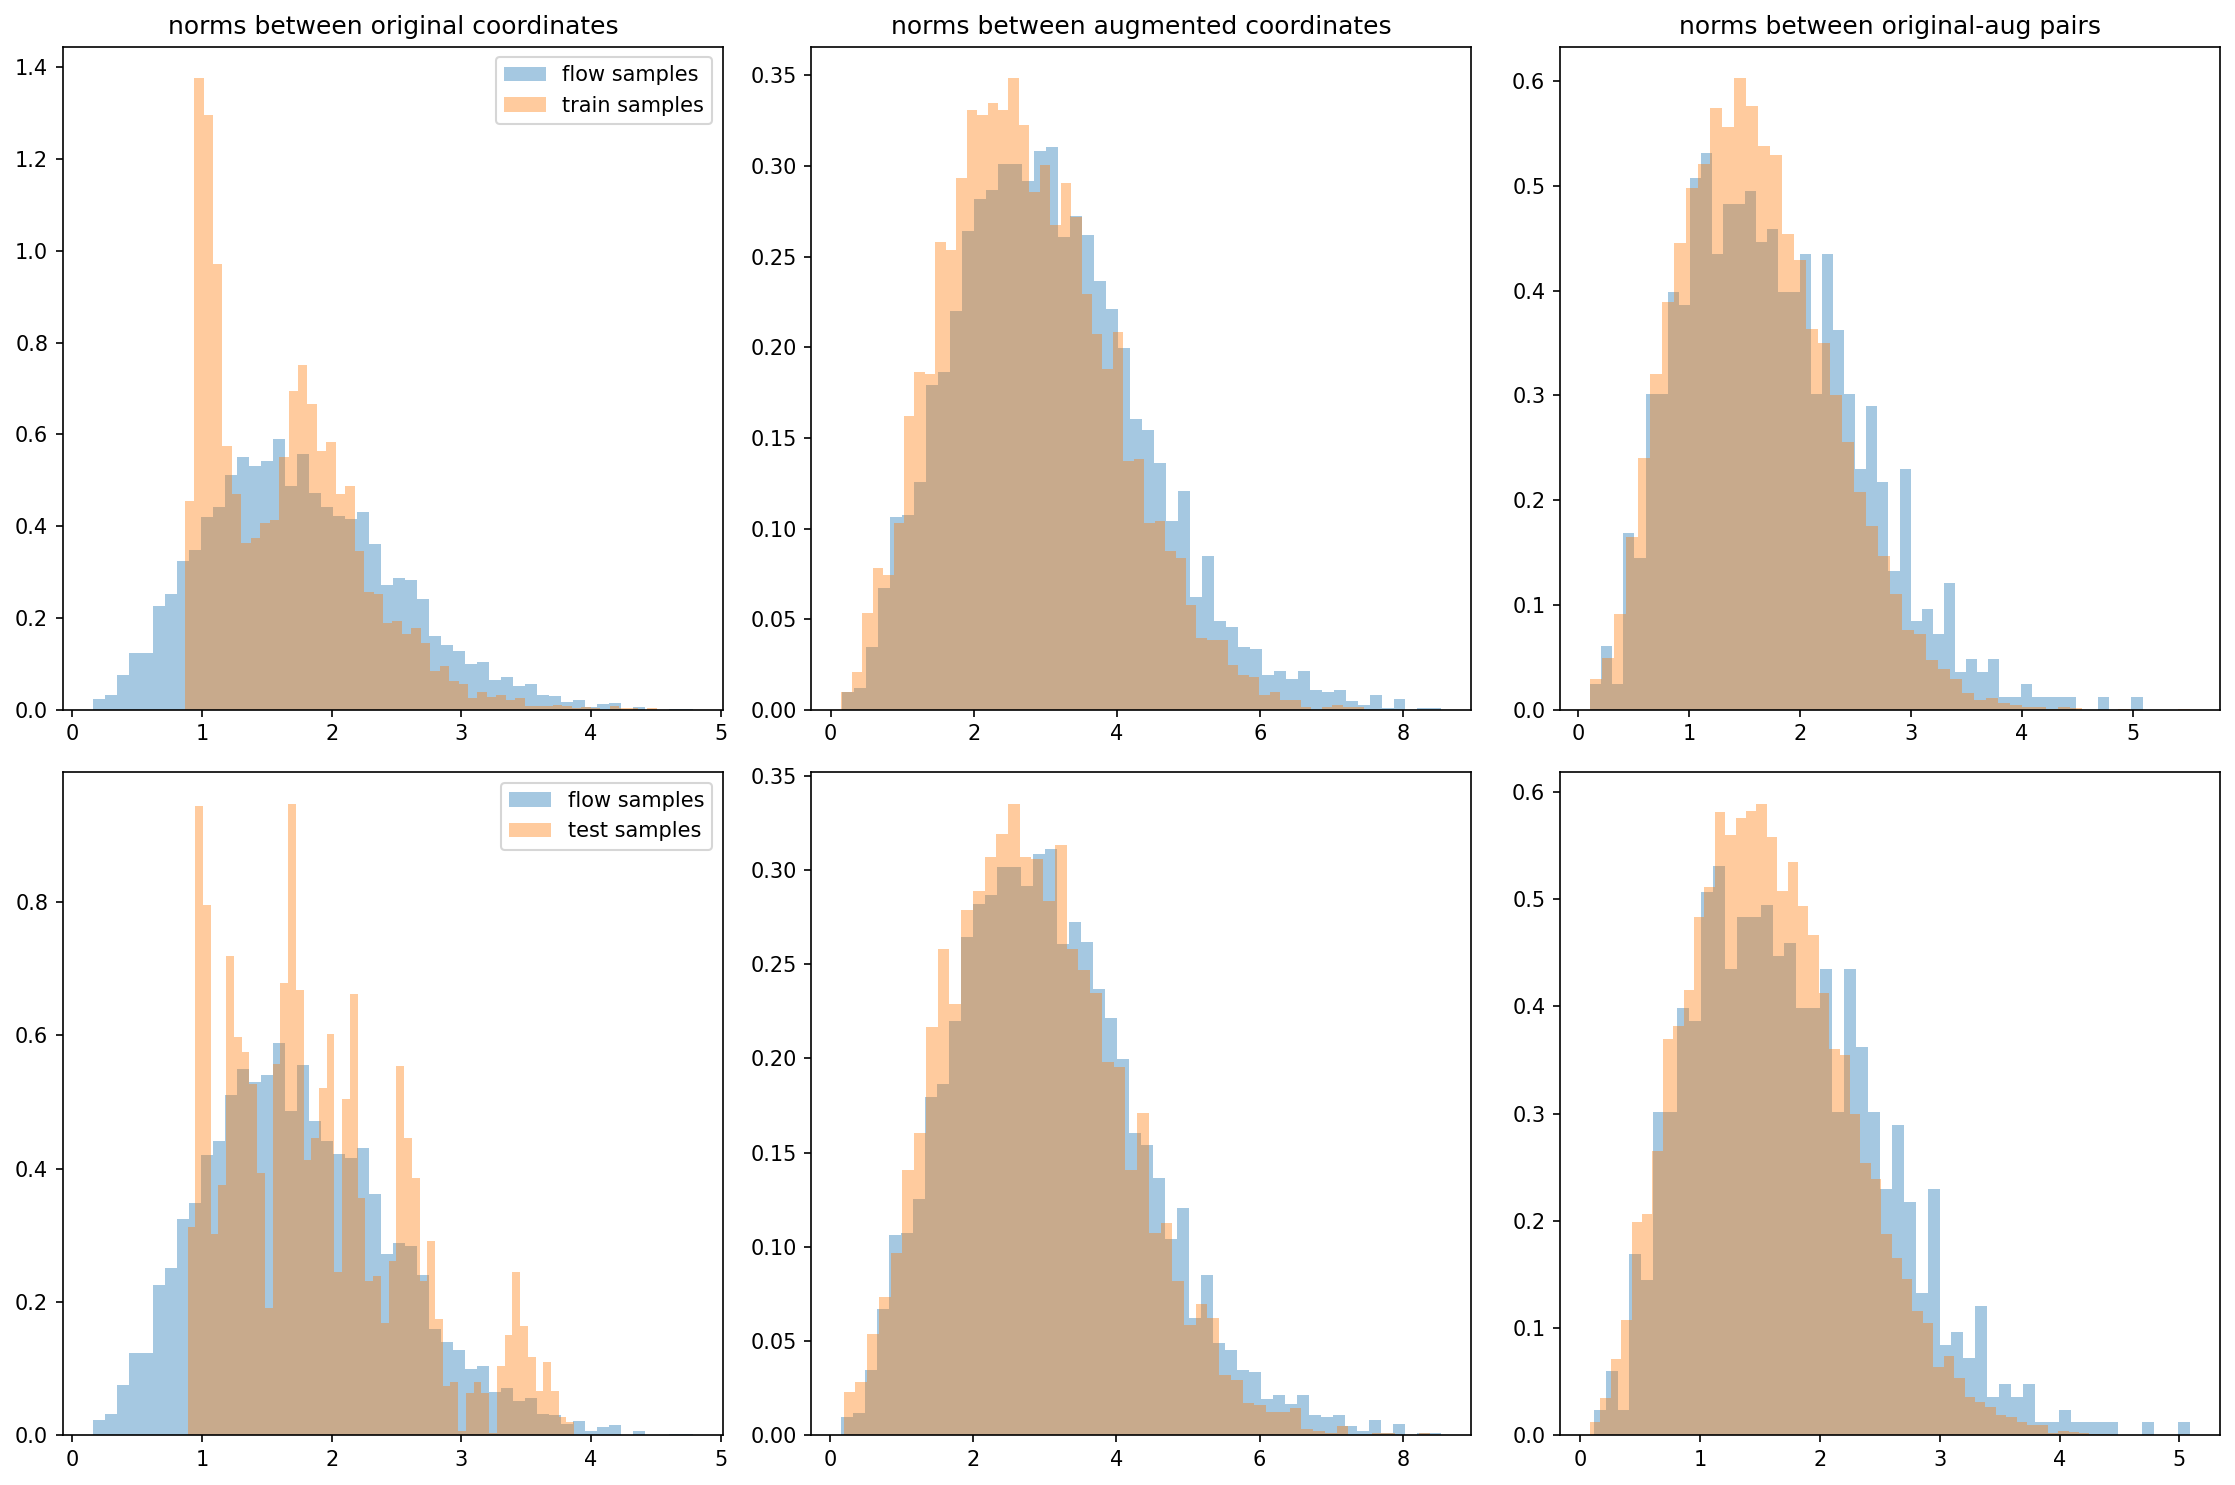

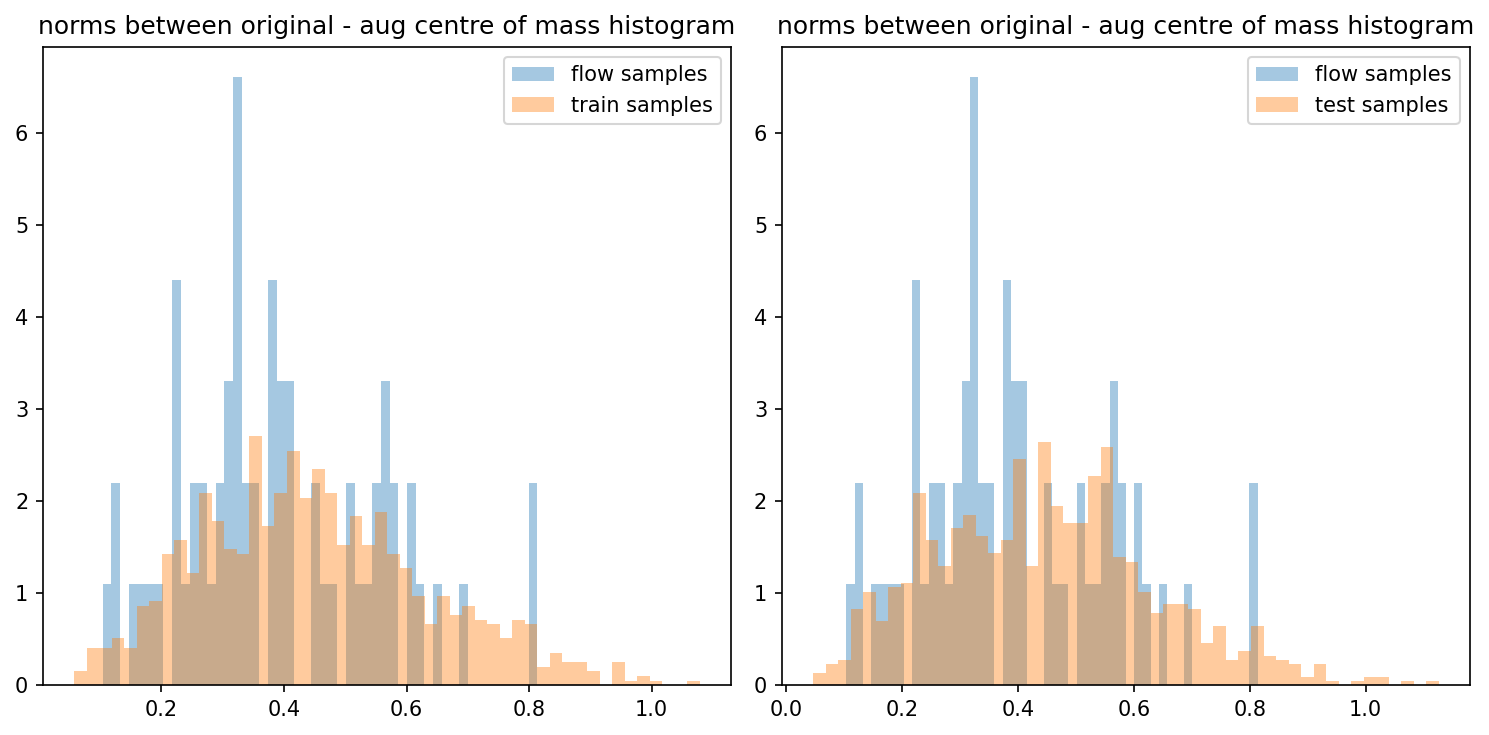

 40%|█████████████████▌                          | 4/10 [01:00<01:07, 11.26s/it]

{'eval_log_lik': Array(-97.544395, dtype=float32), 'eval_marginal_log_lik': Array(-35.710384, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01428579, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00114574, dtype=float32), 'mean_aug_orig_norm': Array(0.38908786, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5333567, dtype=float32)}


 50%|██████████████████████                      | 5/10 [01:00<00:37,  7.51s/it]

{'eval_log_lik': Array(-97.075676, dtype=float32), 'eval_marginal_log_lik': Array(-35.288002, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01165517, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00123556, dtype=float32), 'mean_aug_orig_norm': Array(0.3982343, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5541697, dtype=float32)}


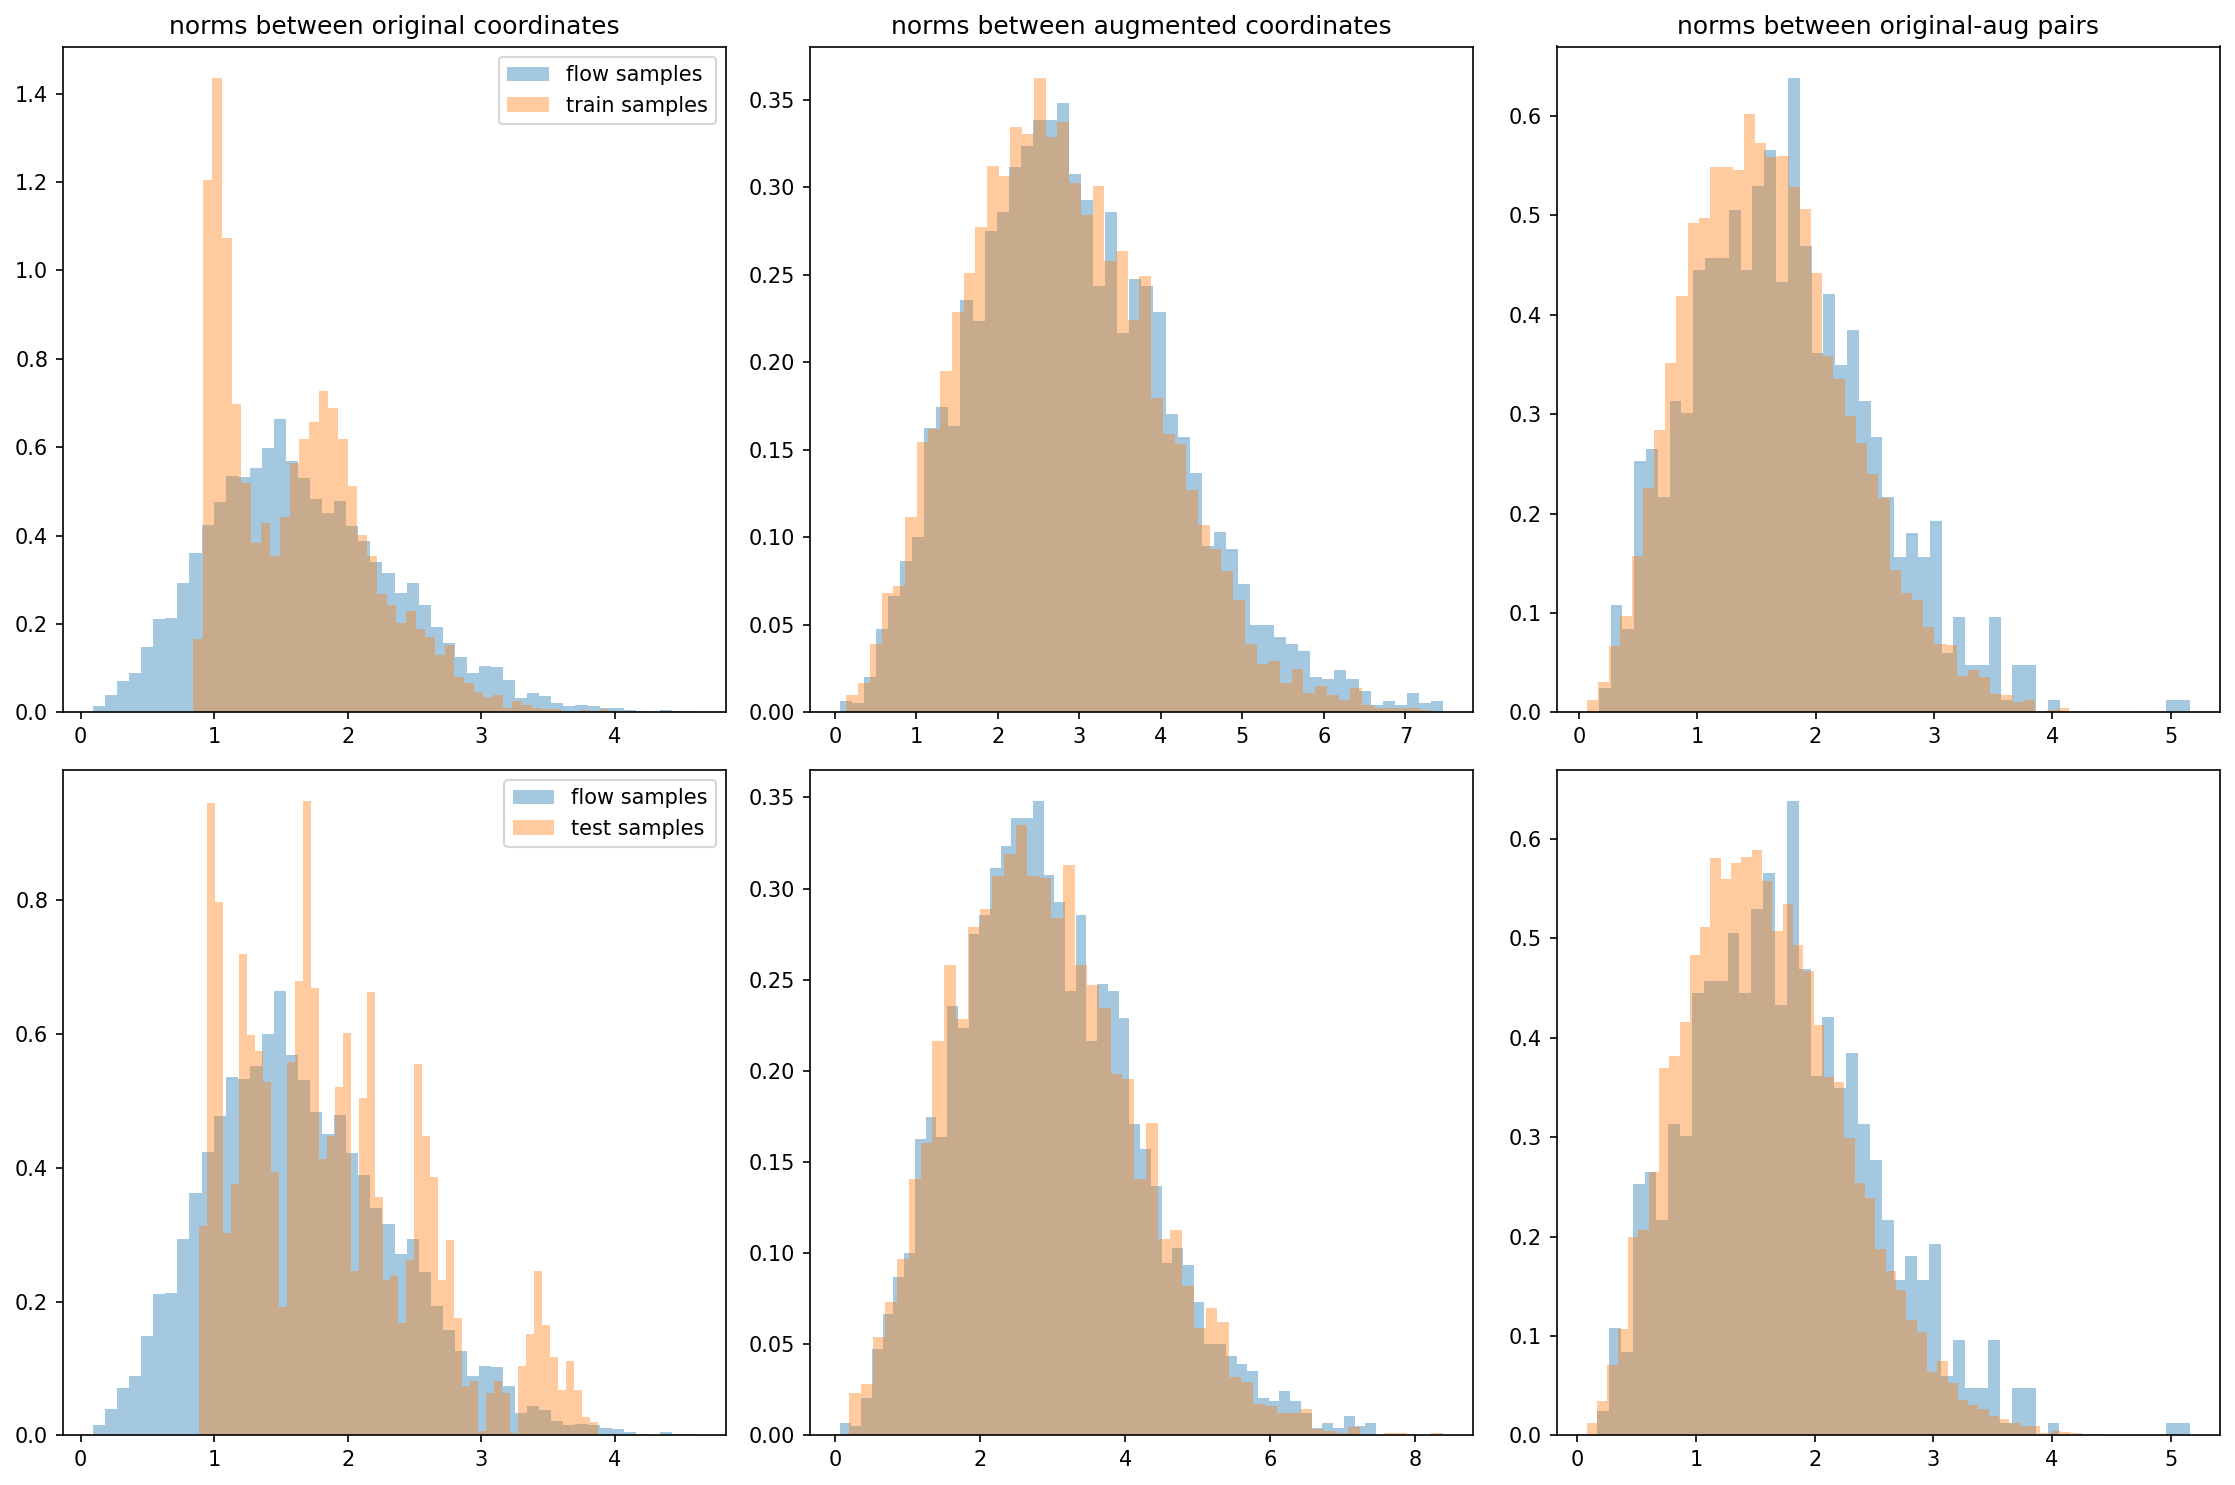

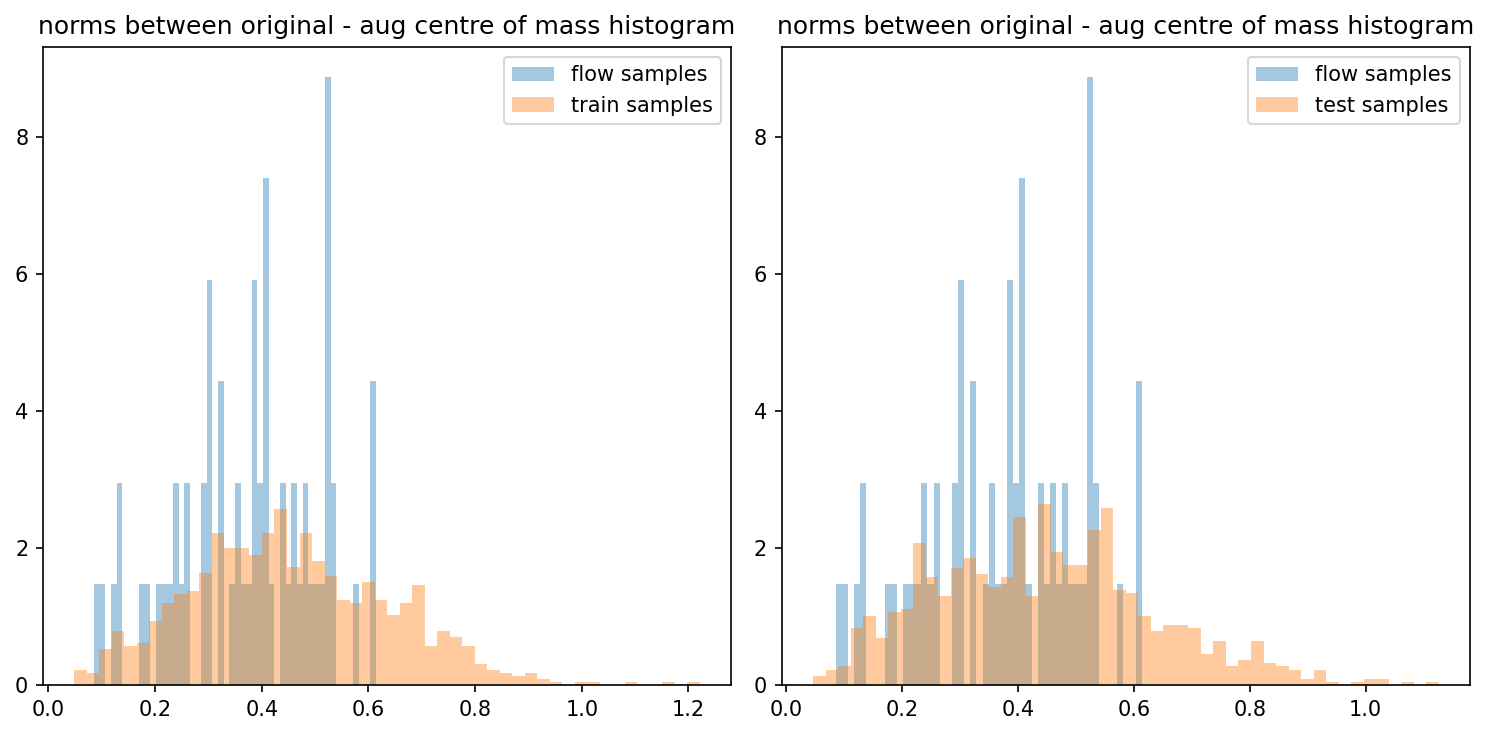

 60%|██████████████████████████▍                 | 6/10 [01:07<00:28,  7.24s/it]

{'eval_log_lik': Array(-96.95348, dtype=float32), 'eval_marginal_log_lik': Array(-35.17462, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01639099, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00159129, dtype=float32), 'mean_aug_orig_norm': Array(0.3447842, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5448385, dtype=float32)}


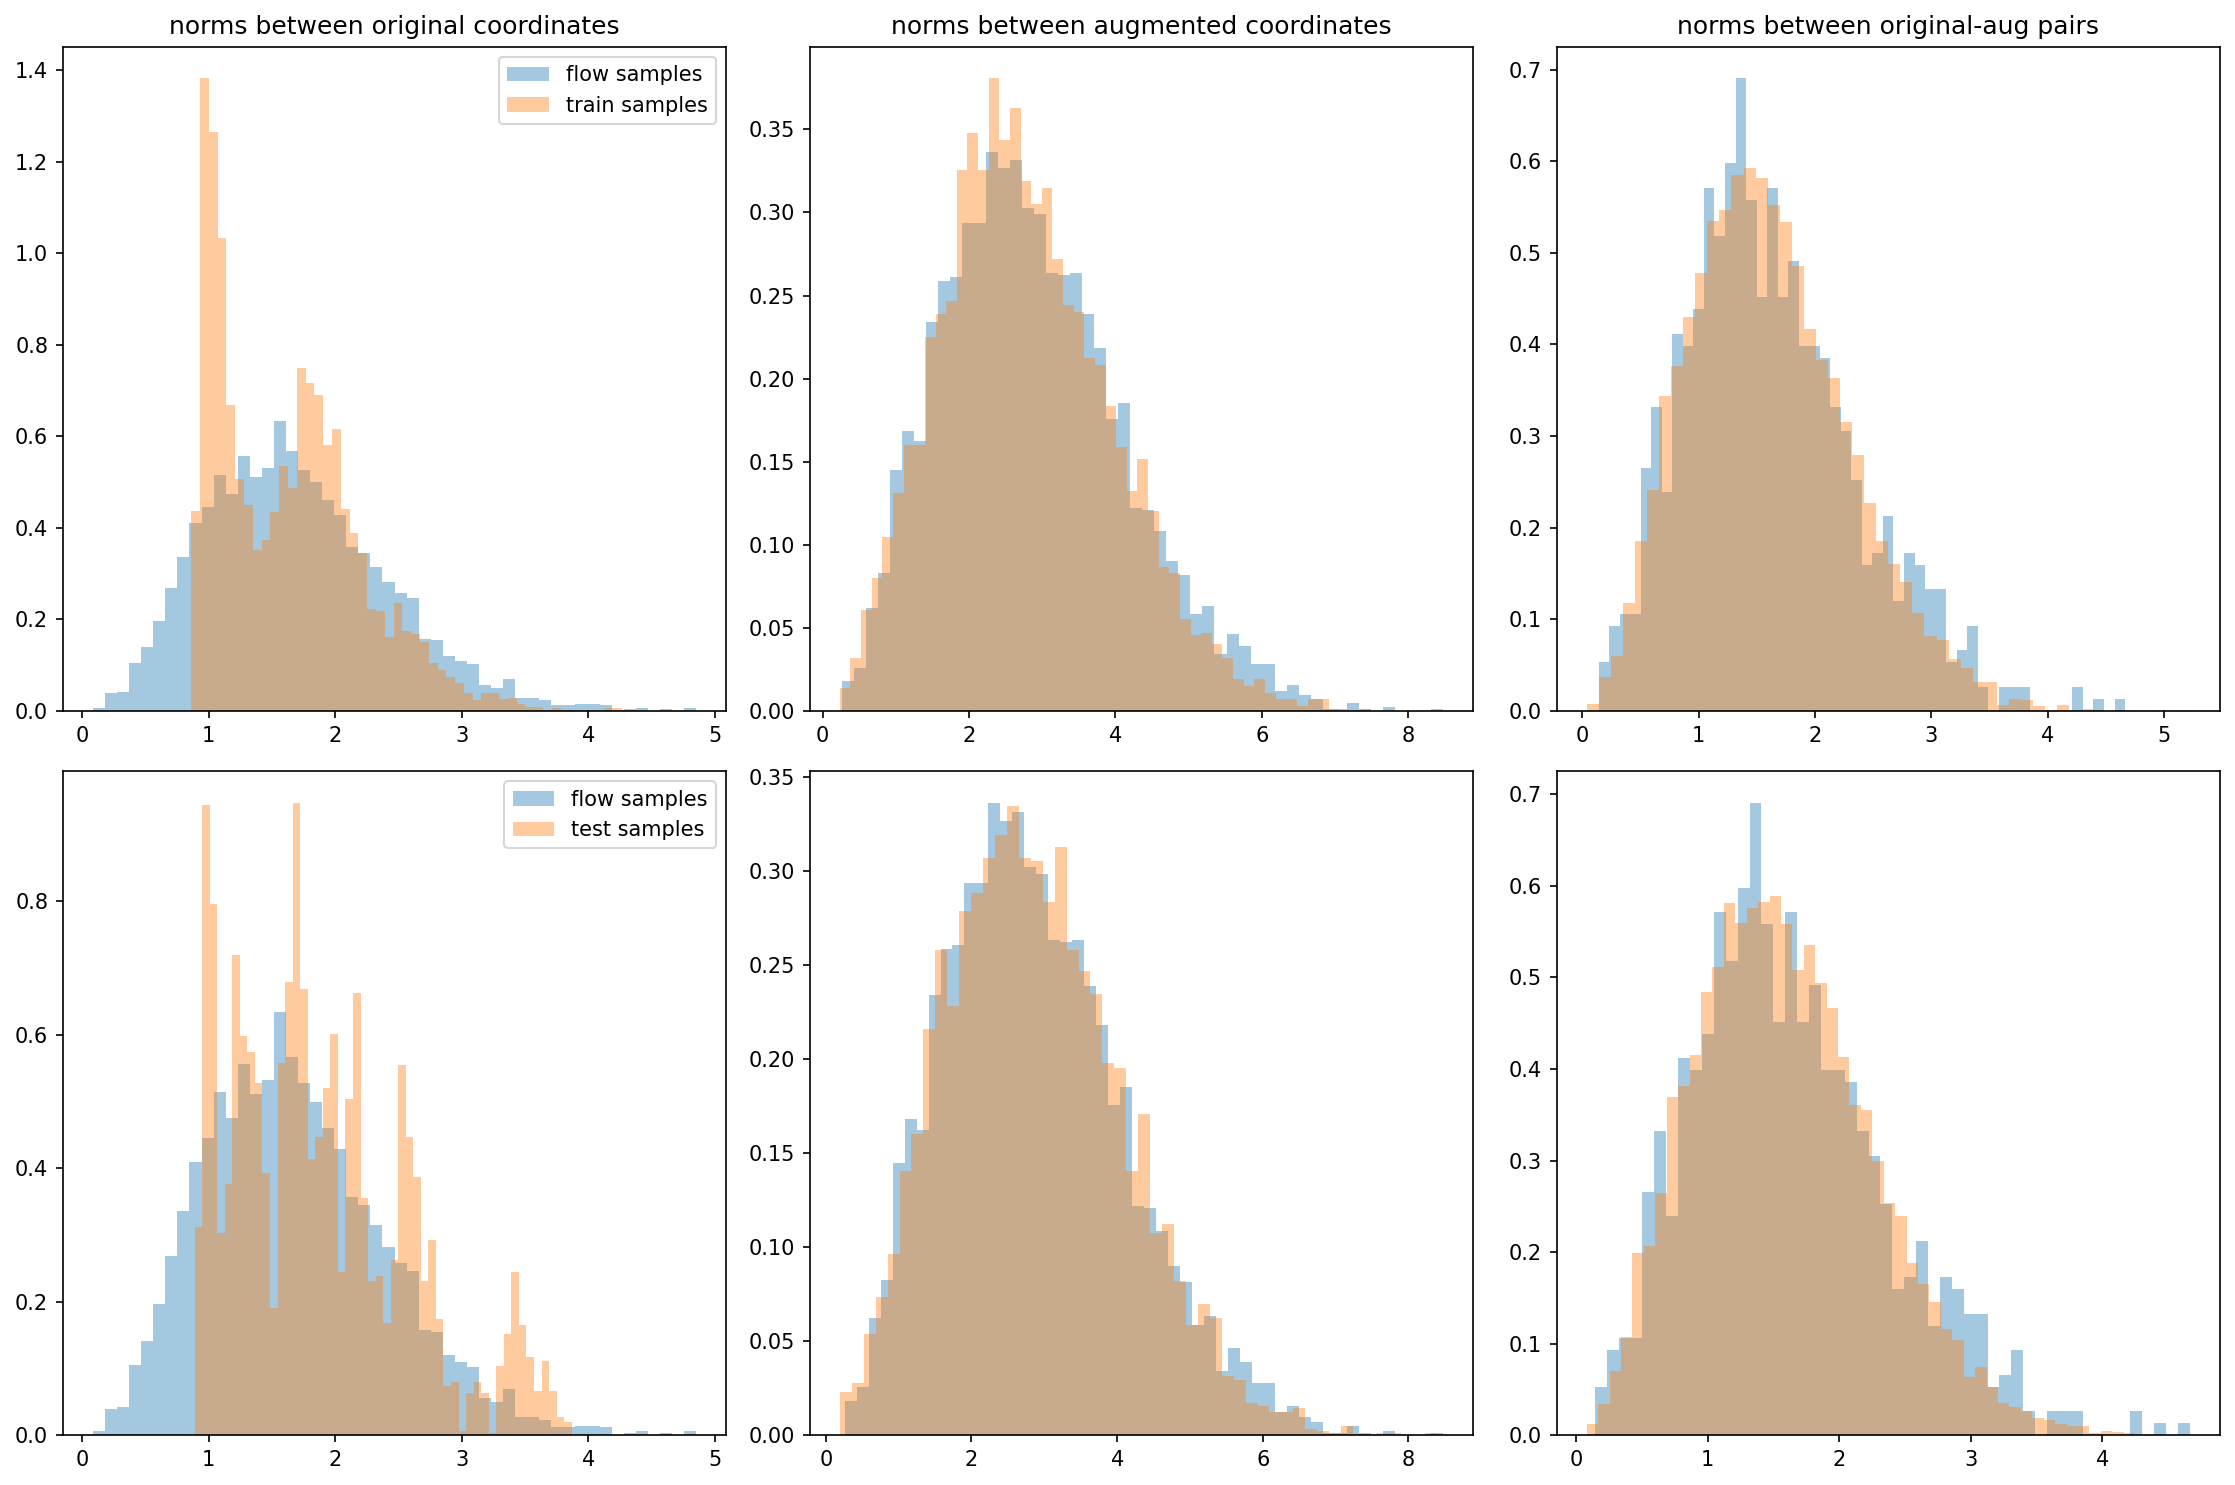

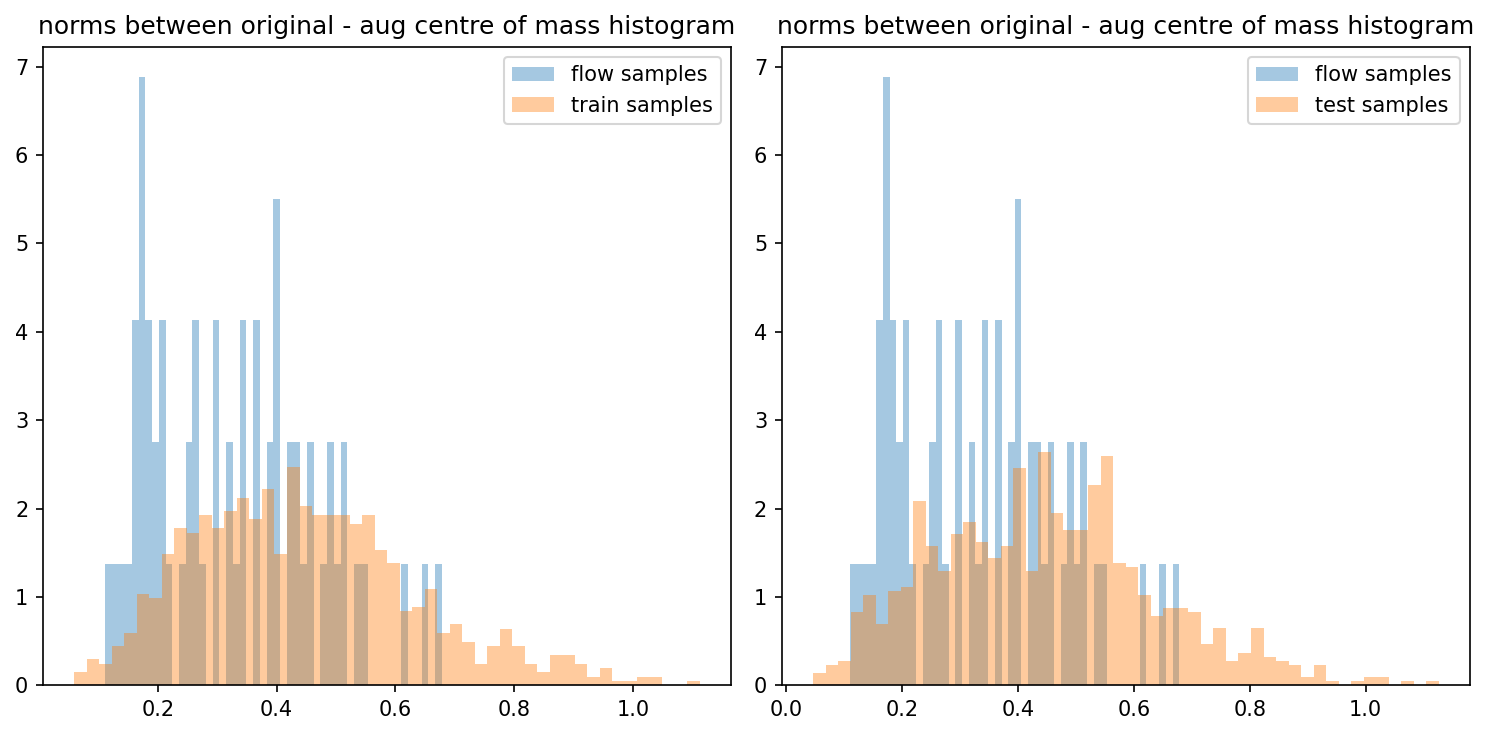

 70%|██████████████████████████████▊             | 7/10 [01:14<00:21,  7.21s/it]

{'eval_log_lik': Array(-96.5331, dtype=float32), 'eval_marginal_log_lik': Array(-34.596275, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01407573, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00153115, dtype=float32), 'mean_aug_orig_norm': Array(0.34679312, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5497781, dtype=float32)}


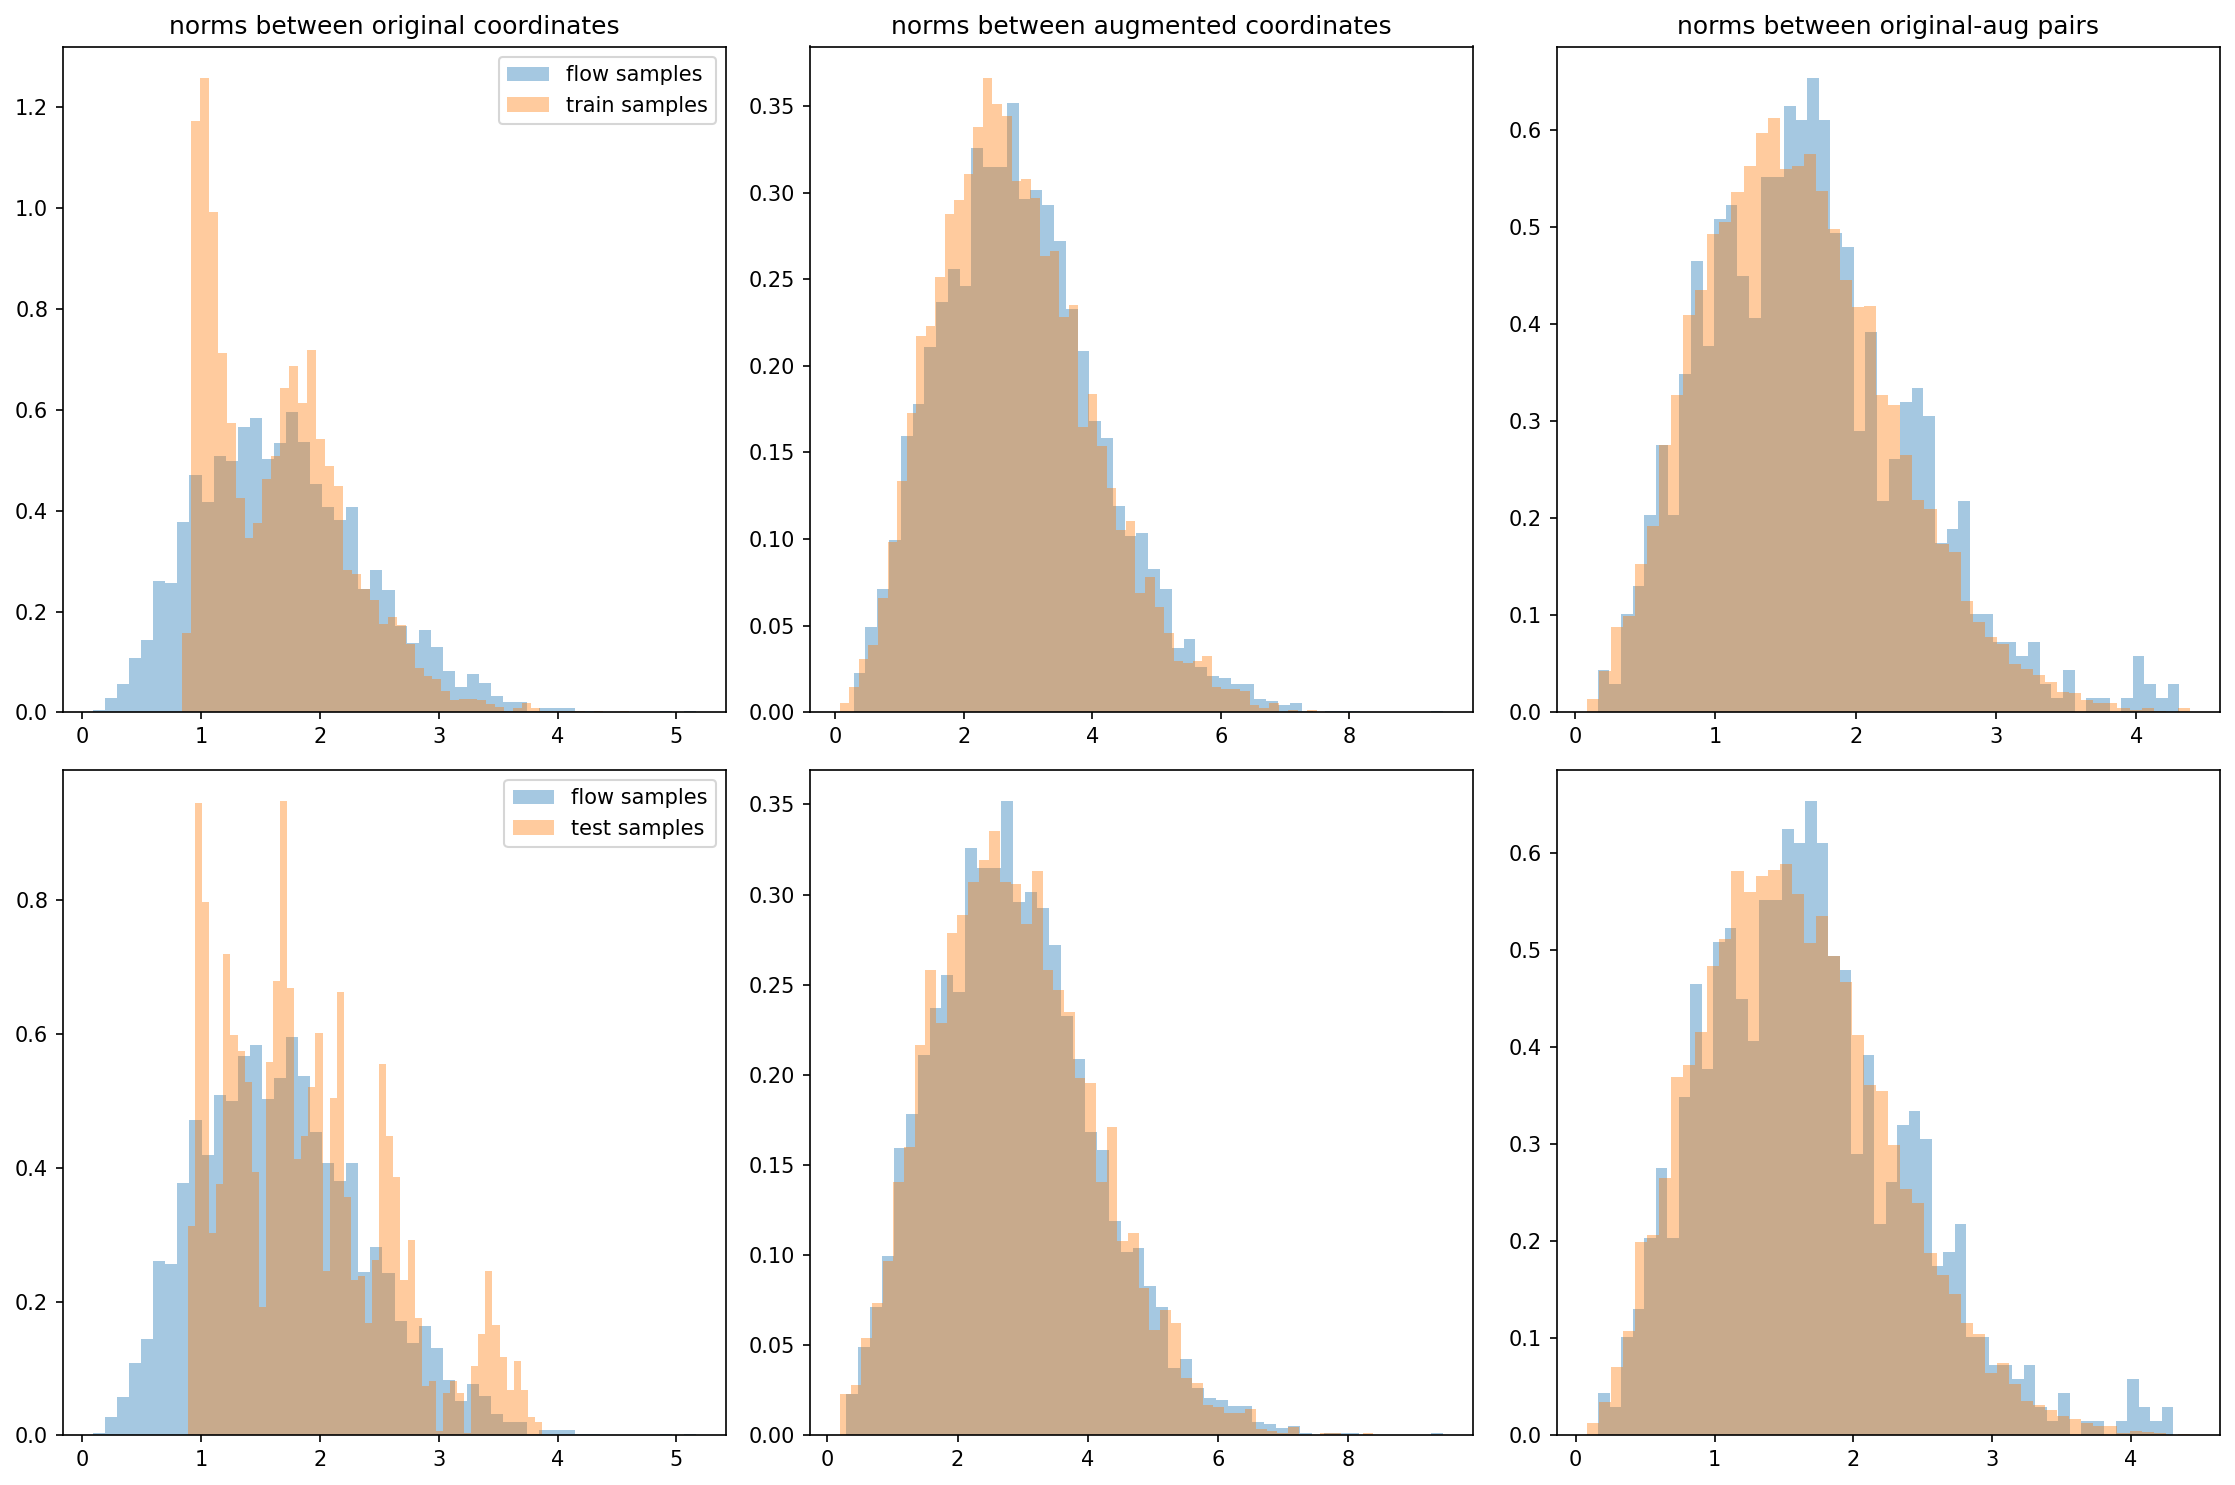

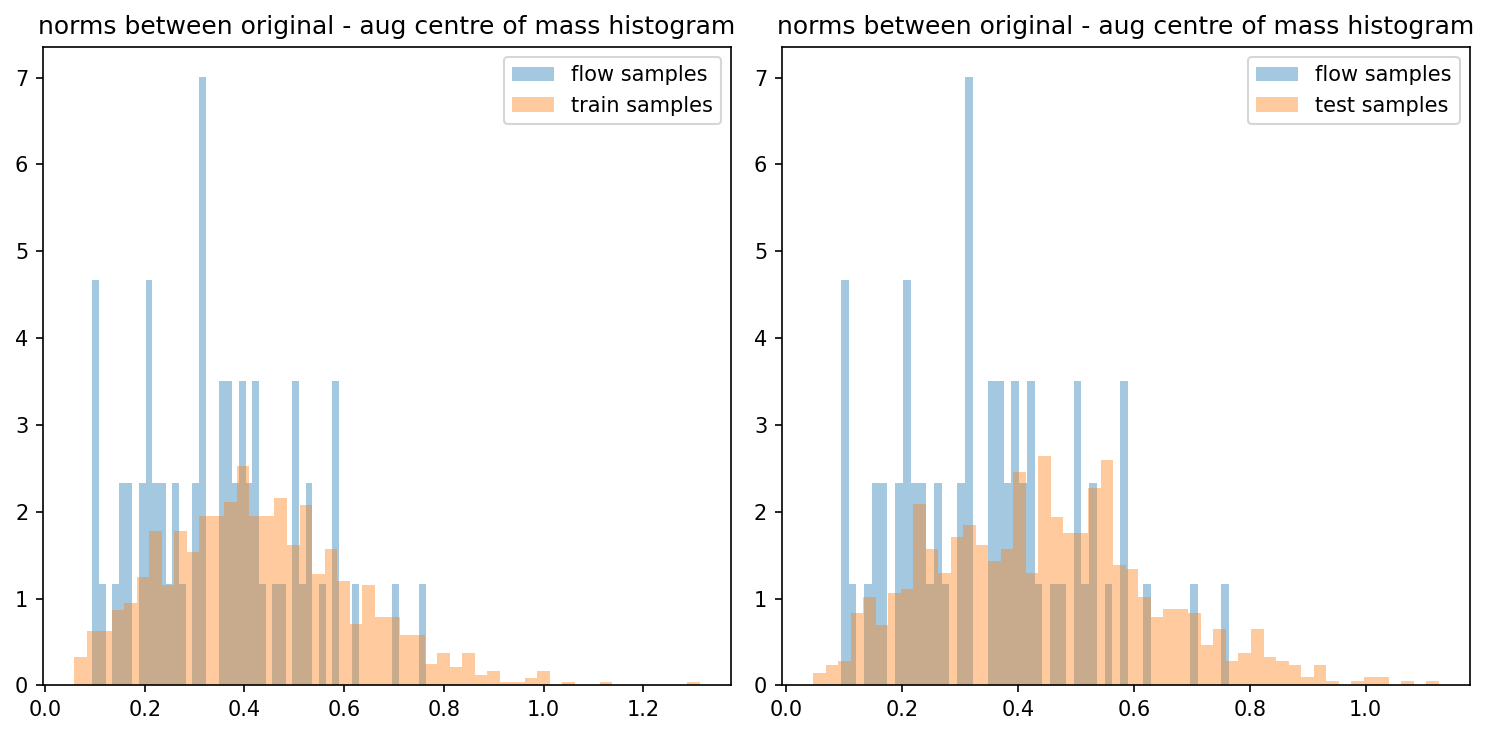

 80%|███████████████████████████████████▏        | 8/10 [01:21<00:14,  7.05s/it]

{'eval_log_lik': Array(-96.59146, dtype=float32), 'eval_marginal_log_lik': Array(-34.700264, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.01977081, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00189032, dtype=float32), 'mean_aug_orig_norm': Array(0.3102488, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5279763, dtype=float32)}


 90%|███████████████████████████████████████▌    | 9/10 [01:22<00:05,  5.12s/it]

{'eval_log_lik': Array(-96.26009, dtype=float32), 'eval_marginal_log_lik': Array(-34.36458, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.02481486, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00221478, dtype=float32), 'mean_aug_orig_norm': Array(0.33929002, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5373691, dtype=float32)}


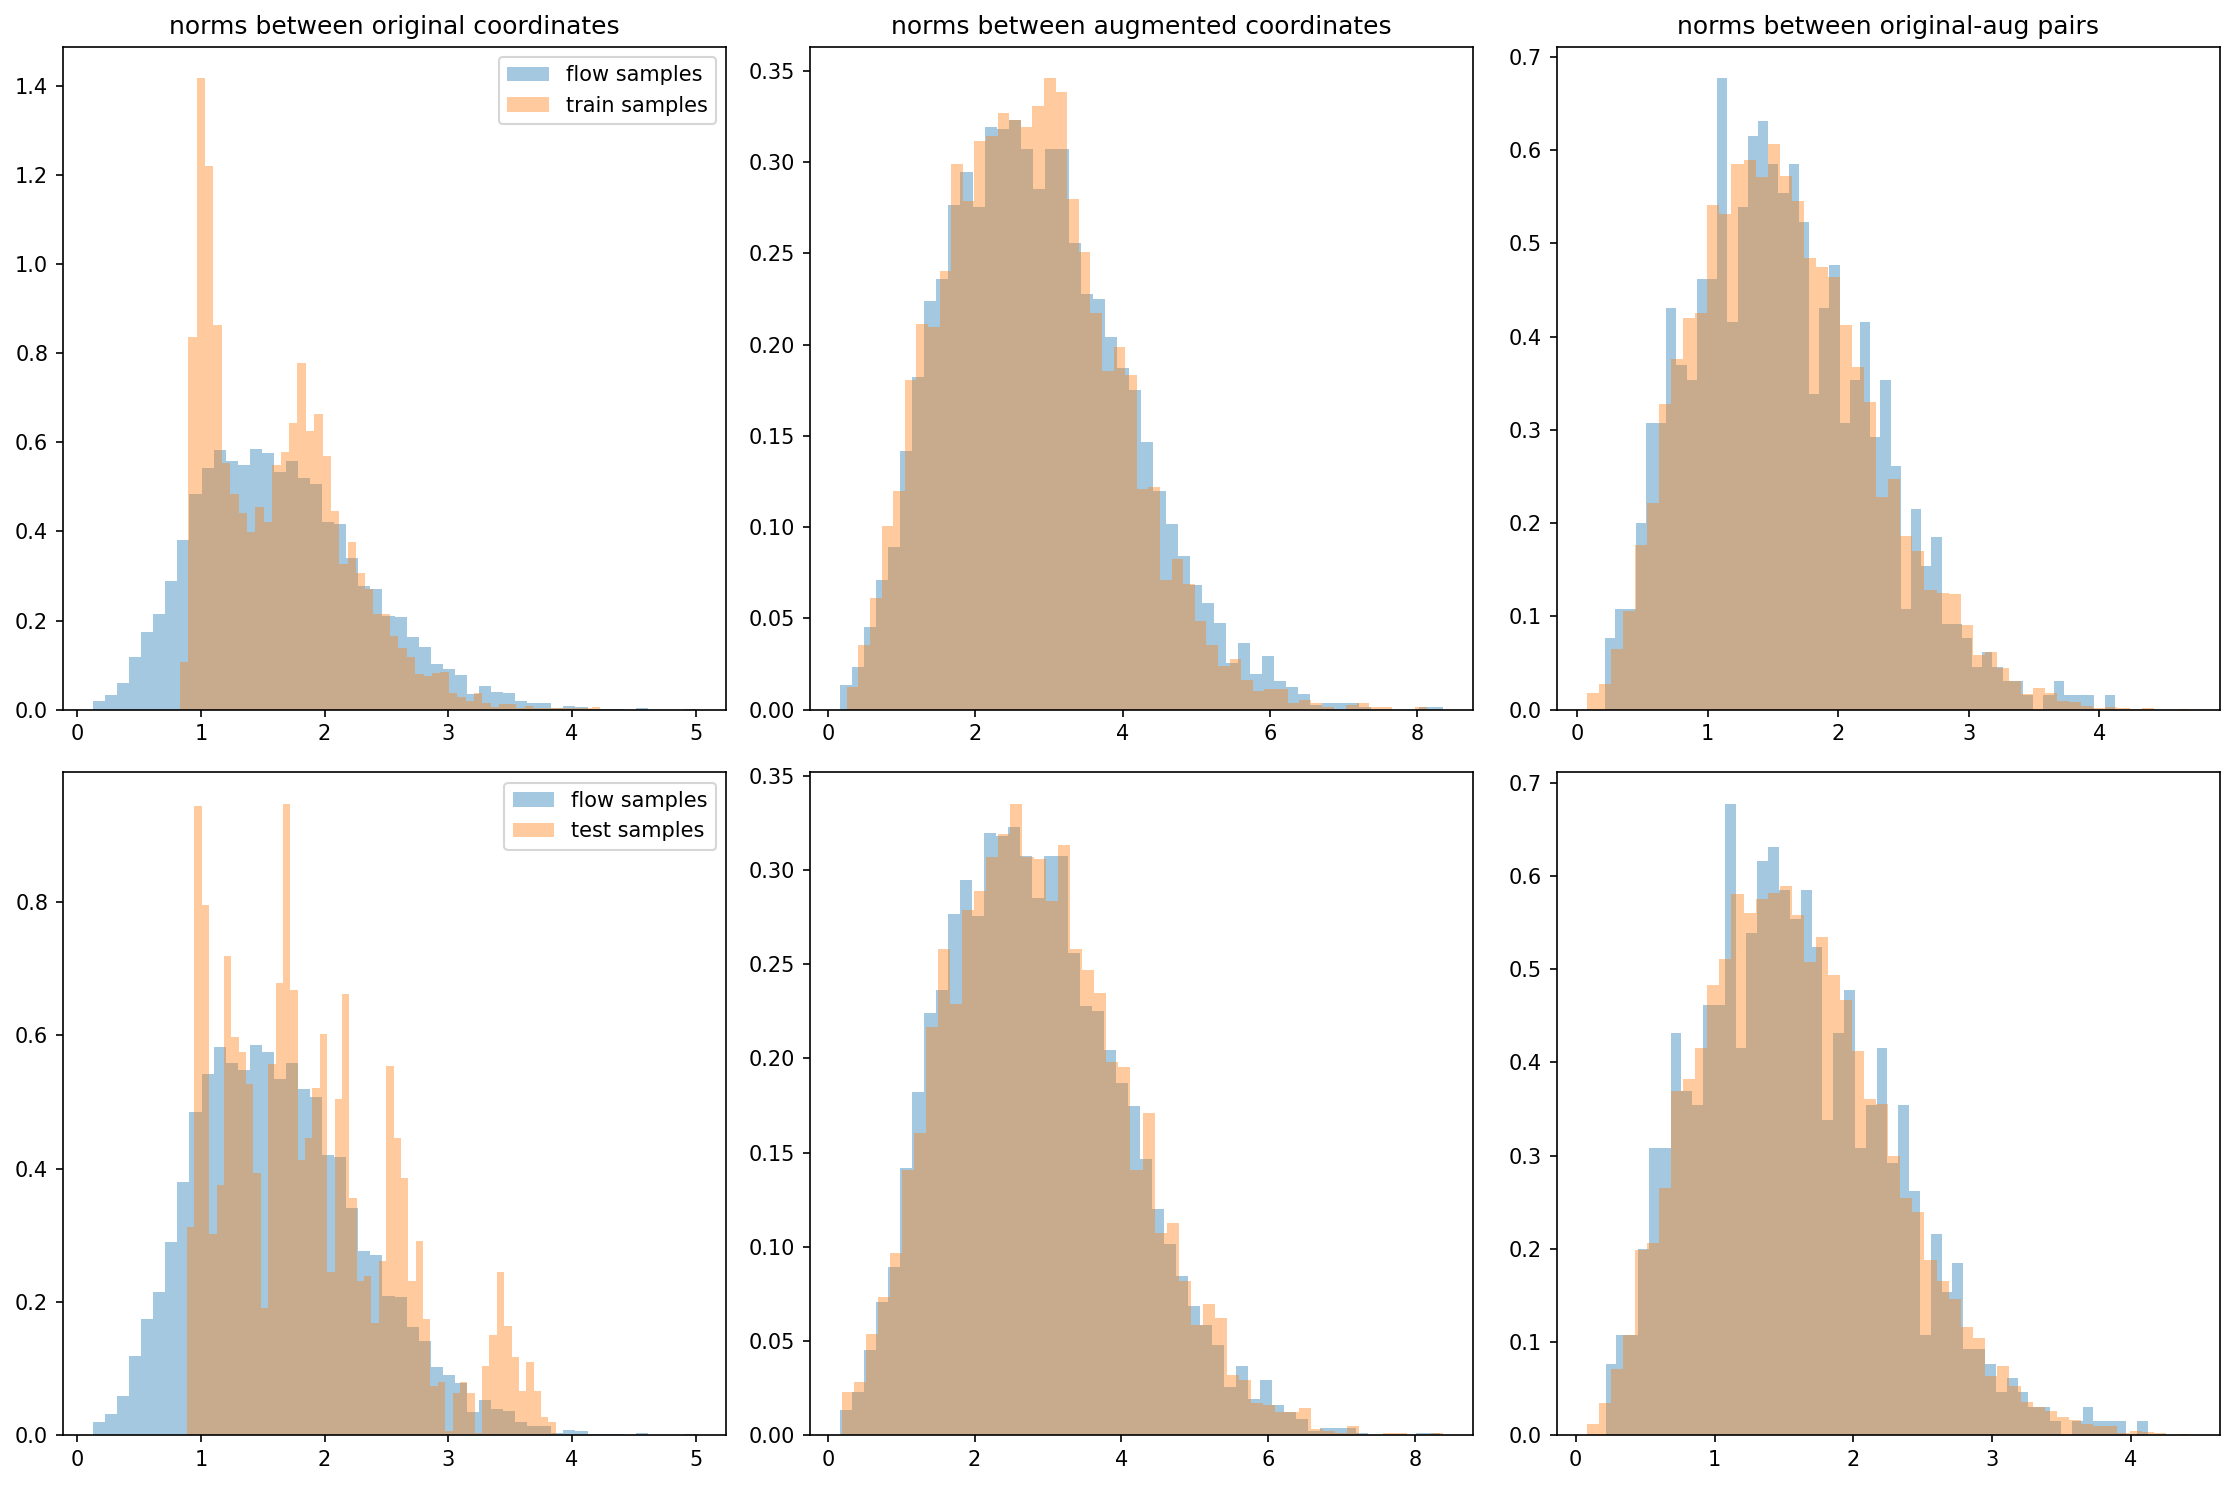

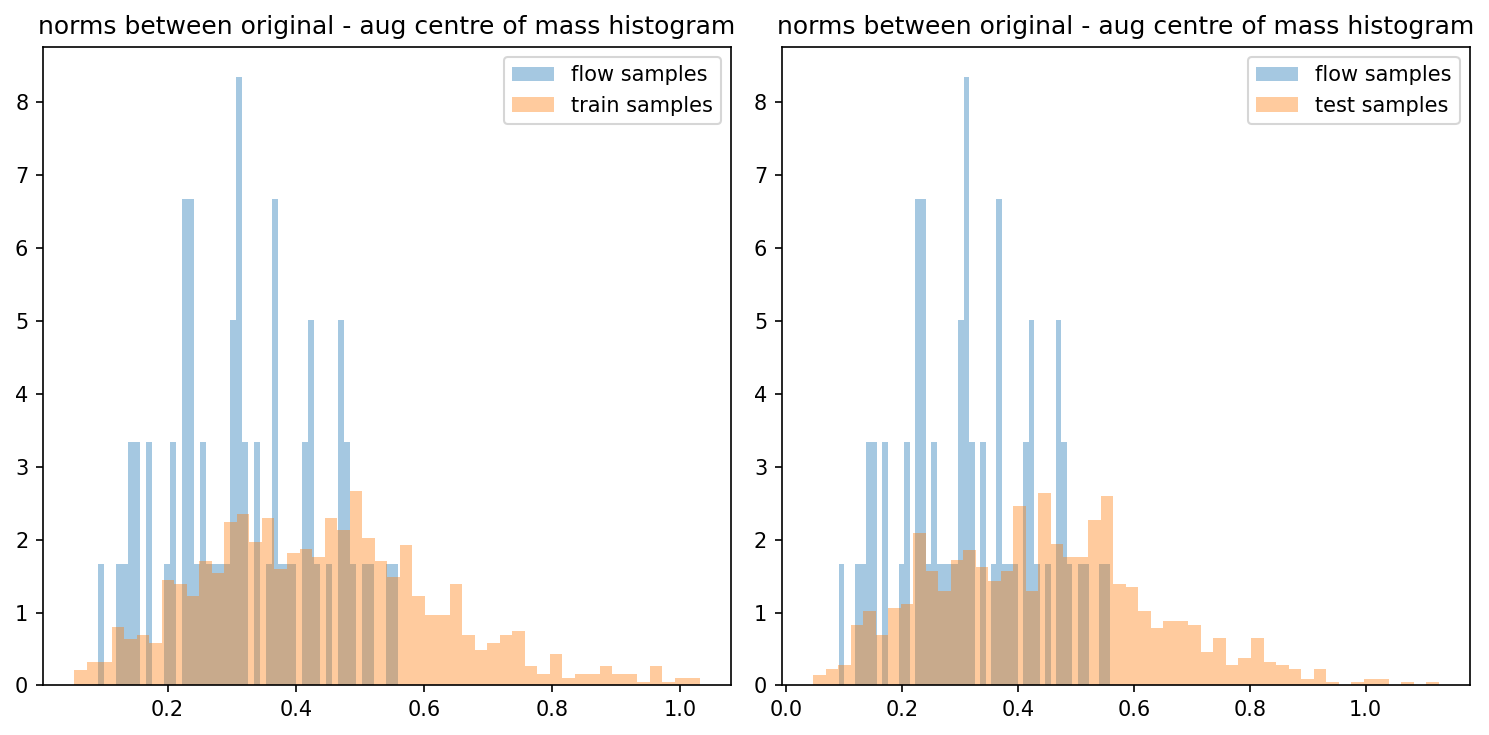

100%|███████████████████████████████████████████| 10/10 [01:29<00:00,  8.94s/it]


{'eval_log_lik': Array(-96.31738, dtype=float32), 'eval_marginal_log_lik': Array(-34.58004, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.05340068, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00290209, dtype=float32), 'mean_aug_orig_norm': Array(0.3077144, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.534161, dtype=float32)}


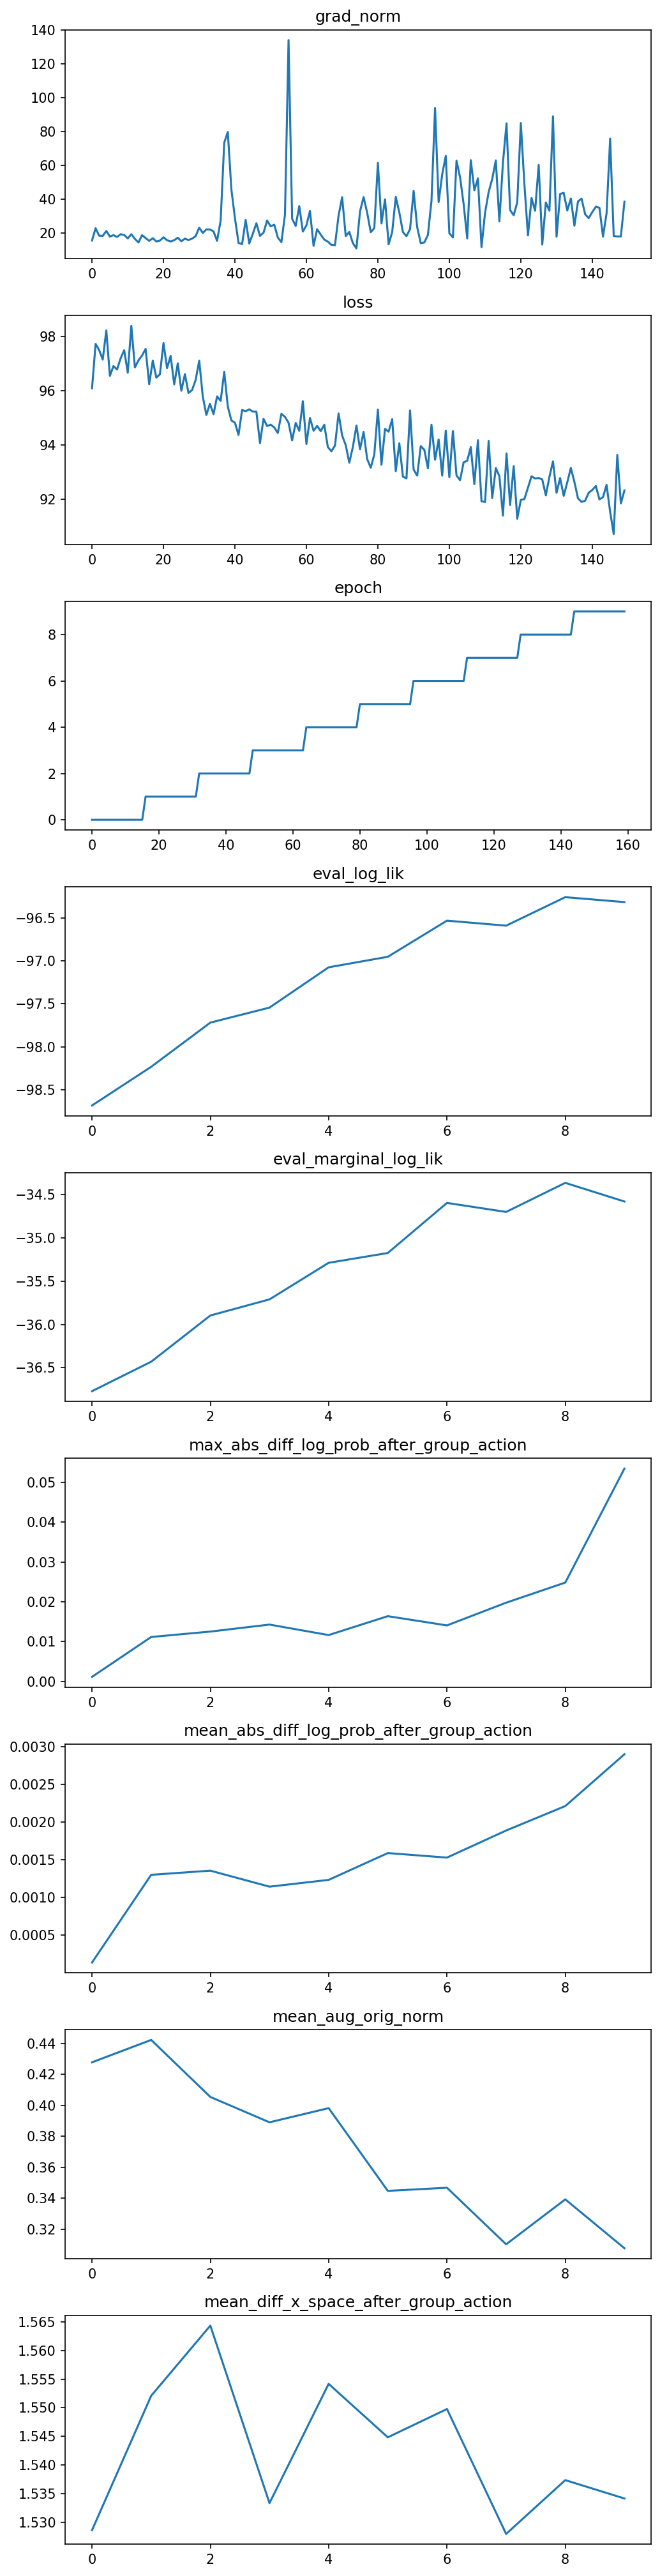

In [10]:
experiment_config = create_train_config(cfg, dim=dim, n_nodes=n_nodes,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [11]:
train_data_original, test_data_original = load_dataset(cfg.training.batch_size, 
                                           1000, 
                                           1000)

In [14]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

[<Figure size 2250x1500 with 6 Axes>, <Figure size 1500x750 with 2 Axes>]

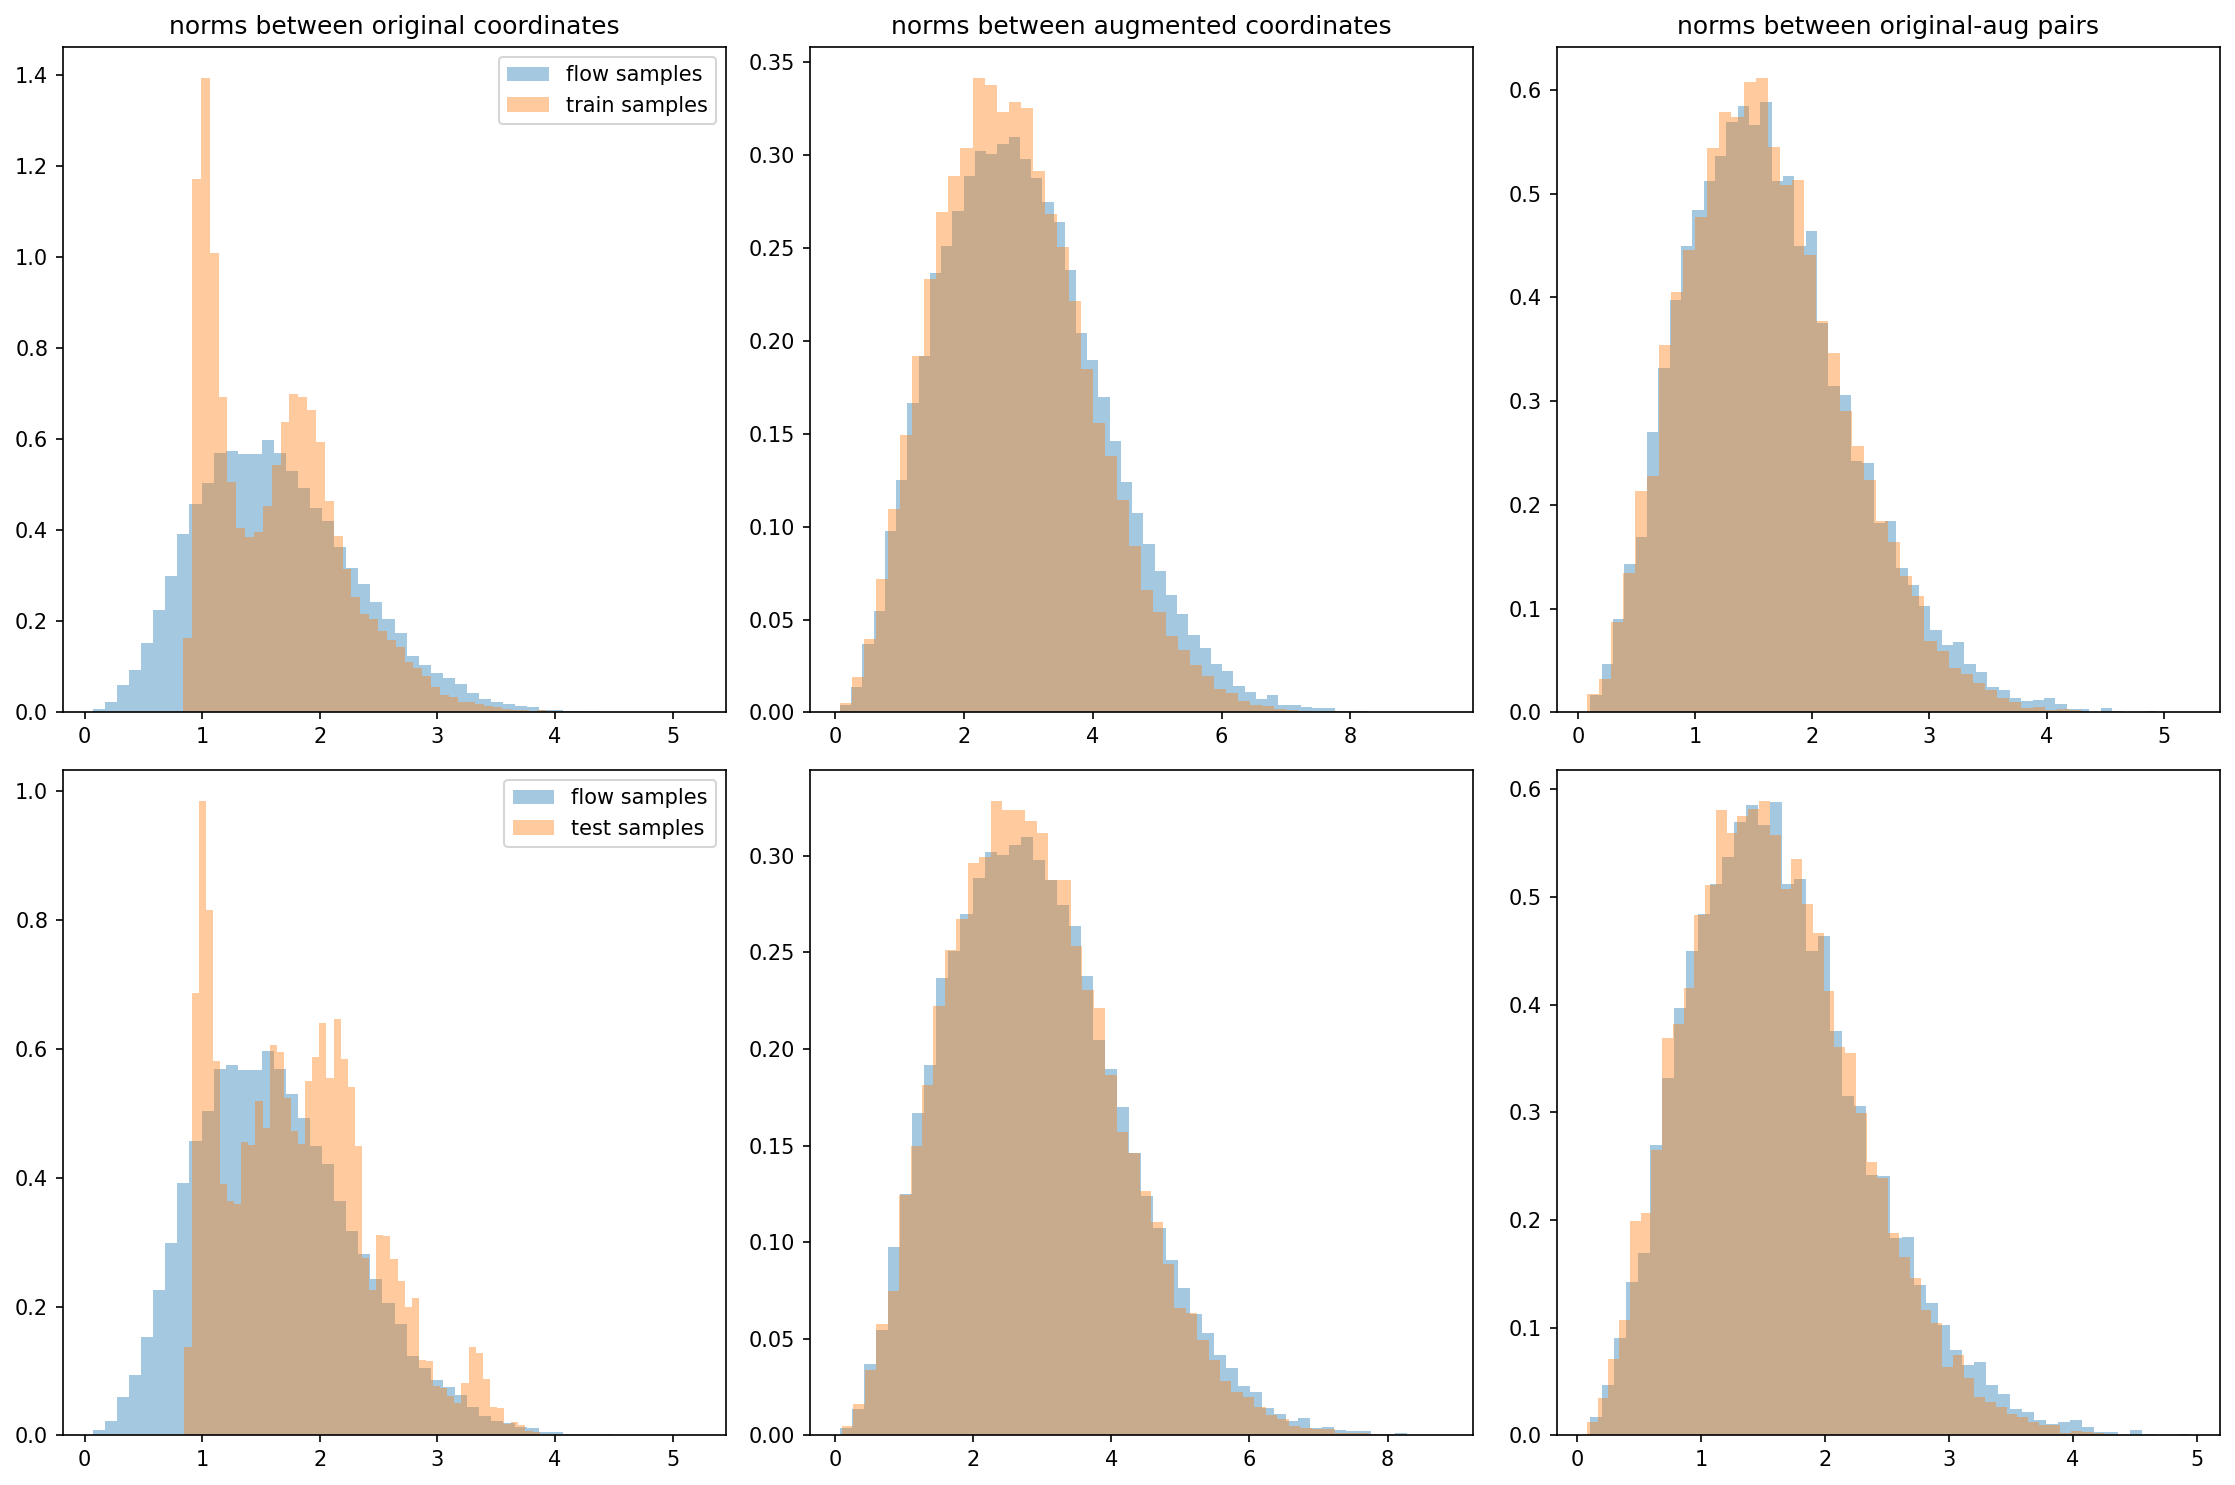

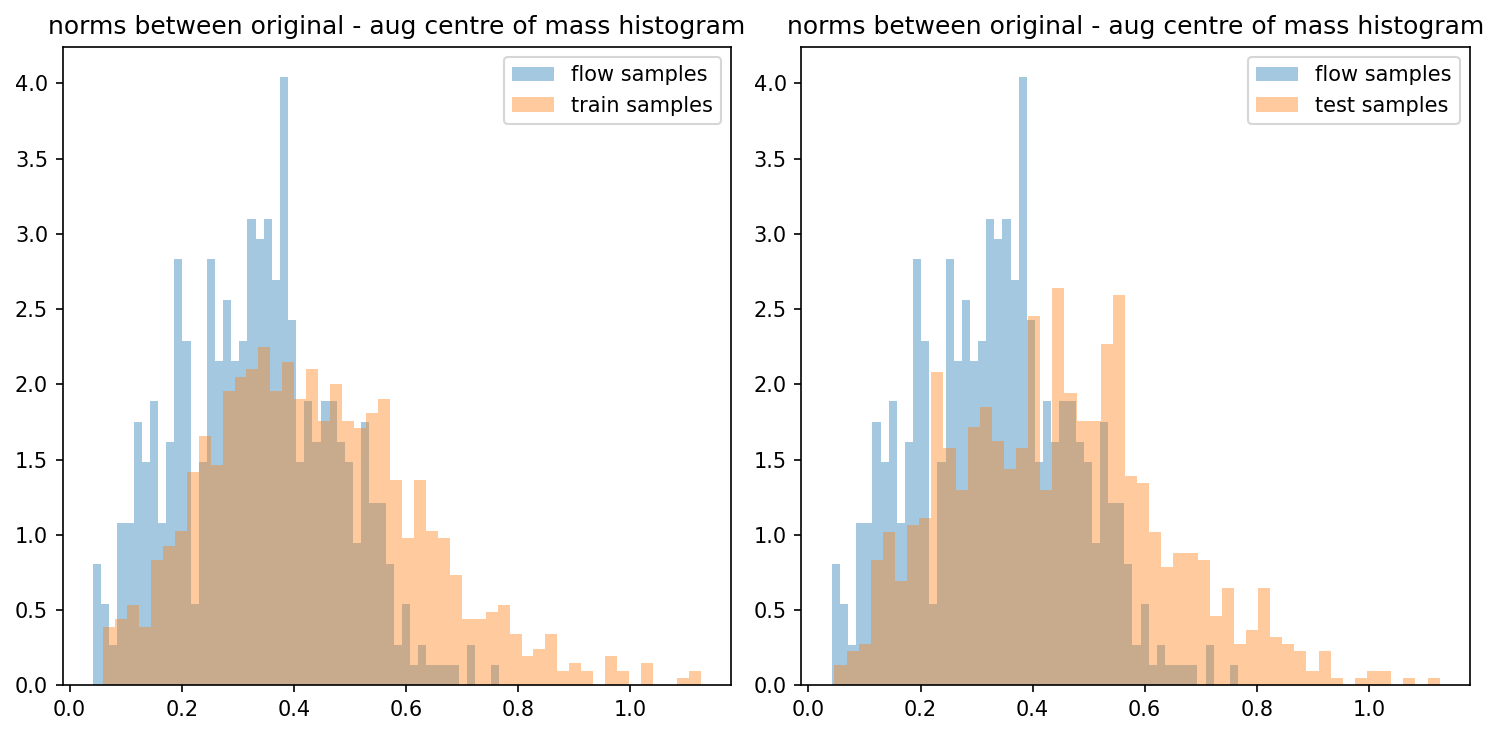

In [15]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [16]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=lj13.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

{'ess': Array(0.015625, dtype=float32),
 'eval_kl': Array(-63.35298, dtype=float32),
 'eval_log_lik': Array(-96.31738, dtype=float32),
 'eval_marginal_log_lik': Array(-33.27009, dtype=float32),
 'max_abs_diff_log_prob_after_group_action': Array(0.05249176, dtype=float32),
 'mean_abs_diff_log_prob_after_group_action': Array(0.00293919, dtype=float32),
 'mean_aug_orig_norm': Array(0.32408702, dtype=float32),
 'mean_diff_x_space_after_group_action': Array(1.5244074, dtype=float32)}

# 